# INF 1340 Final Project
### Name: Kuan Yi Chou

### Student number: 

In [28]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data Cleaning
### 1.1 SHEET 1

In [29]:
#1.1 import the first sheet of the data
#start reading an Excel sheet from row 15 since row 1 - row 14 are introduction of the data
data_sheet1 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 1", header=15)
data_sheet1 = pd.DataFrame(data_sheet1)
#replace all the NA value as 0
data_sheet1.replace('..', 0, inplace=True)
#rename the column with the title "unnamed"
data_sheet1.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet1.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet1.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet1.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)
data_sheet1.rename(columns={'Unnamed: 4': 'Type of data (a)'},inplace=True)

#rename the columns that contain the data of International migrant stock at mid-year (both sexes)
data_sheet1 = data_sheet1.rename(columns={data_sheet1.columns[5]: '1990_both sexes',data_sheet1.columns[6]: '1995_both sexes', data_sheet1.columns[7]: '2000_both sexes',data_sheet1.columns[8]: '2005_both sexes', data_sheet1.columns[9]: '2010_both sexes',data_sheet1.columns[10]: '2015_both sexes' })
#rename the columns that contain the data of International migrant stock at mid-year (male)
data_sheet1.rename(columns={'1990.1': '1990_male', '1995.1': '1995_male', '2000.1': '2000_male','2005.1': '2005_male', '2010.1': '2010_male', '2015.1': '2015_male'},inplace=True)
#rename the columns that contain the data of International migrant stock at mid-year (female)
data_sheet1.rename(columns={'1990.2': '1990_female', '1995.2': '1995_female', '2000.2': '2000_female','2005.2': '2005_female', '2010.2': '2010_female', '2015.2': '2015_female'},inplace=True)
#data_sheet1

In [30]:
#Melt dataframe, resolve tidy principle 1 violation, make year and gender become variables
tidy_data_sheet1=data_sheet1.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="International migrant stock at mid-year")
#Separate variable into year, sex, resolve tidy principle 2 violation
tidy_data_sheet1['Year'] = tidy_data_sheet1['variable'].str.split('_').str[0]
tidy_data_sheet1['Sex'] = tidy_data_sheet1['variable'].str.split('_').str[1]
tidy_data_sheet1 = tidy_data_sheet1.drop(['variable'], axis=1)
#tidy_data_sheet1.head()
#Drop Notes and Types of data columns to enable pivot function
tidy_data_sheet1 = tidy_data_sheet1.drop(['Notes','Type of data (a)'],axis=1)

In [31]:
#Pivot the table, sort by sort order , sex , year
pivot_data_sheet1 = pd.pivot_table(tidy_data_sheet1,index= ['Sort Order','Country Code',"Major area, region, country or area of destination", "Sex","Year","International migrant stock at mid-year"])
pivot_data_sheet1

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, both sexes, 1990, 152563212), (1, 900, WORLD, both sexes, 1995, 160801752), (1, 900, WORLD, both sexes, 2000, 172703309), (1, 900, WORLD, both sexes, 2005, 191269100), (1, 900, WORLD, both sexes, 2010, 221714243), (1, 900, WORLD, both sexes, 2015, 243700236), (1, 900, WORLD, female, 1990, 74815702), (1, 900, WORLD, female, 1995, 79064275), (1, 900, WORLD, female, 2000, 84818470), (1, 900, WORLD, female, 2005, 93402426), (1, 900, WORLD, female, 2010, 107100529), (1, 900, WORLD, female, 2015, 117584801), (1, 900, WORLD, male, 1990, 77747510), (1, 900, WORLD, male, 1995, 81737477), (1, 900, WORLD, male, 2000, 87884839), (1, 900, WORLD, male, 2005, 97866674), (1, 900, WORLD, male, 2010, 114613714), (1, 900, WORLD, male, 2015, 126115435), (2, 901, Developed regions, both sexes, 1990, 82378628), (2, 901, Developed regions, both sexes, 1995, 92306854), (2, 901, Developed regions, both sexes, 2000, 103375363), (2, 901, Developed regions, both sexes, 2005, 117181109), (2, 901, Developed regions, both sexes, 2010, 132560325), (2, 901, Developed regions, both sexes, 2015, 140481955), (2, 901, Developed regions, female, 1990, 42115231), (2, 901, Developed regions, female, 1995, 47214055), (2, 901, Developed regions, female, 2000, 52838567), (2, 901, Developed regions, female, 2005, 59963332), (2, 901, Developed regions, female, 2010, 68479248), (2, 901, Developed regions, female, 2015, 72863336), (2, 901, Developed regions, male, 1990, 40263397), (2, 901, Developed regions, male, 1995, 45092799), (2, 901, Developed regions, male, 2000, 50536796), (2, 901, Developed regions, male, 2005, 57217777), (2, 901, Developed regions, male, 2010, 64081077), (2, 901, Developed regions, male, 2015, 67618619), (3, 902, Developing regions, both sexes, 1990, 70184584), (3, 902, Developing regions, both sexes, 1995, 68494898), (3, 902, Developing regions, both sexes, 2000, 69327946), (3, 902, Developing regions, both sexes, 2005, 74087991), (3, 902, Developing regions, both sexes, 2010, 89153918), (3, 902, Developing regions, both sexes, 2015, 103218281), (3, 902, Developing regions, female, 1990, 32700471), (3, 902, Developing regions, female, 1995, 31850220), (3, 902, Developing regions, female, 2000, 31979903), (3, 902, Developing regions, female, 2005, 33439094), (3, 902, Developing regions, female, 2010, 38621281), (3, 902, Developing regions, female, 2015, 44721465), (3, 902, Developing regions, male, 1990, 37484113), (3, 902, Developing regions, male, 1995, 36644678), (3, 902, Developing regions, male, 2000, 37348043), (3, 902, Developing regions, male, 2005, 40648897), (3, 902, Developing regions, male, 2010, 50532637), (3, 902, Developing regions, male, 2015, 58496816), (4, 941, Least developed countries, both sexes, 1990, 11075966), (4, 941, Least developed countries, both sexes, 1995, 11711703), (4, 941, Least developed countries, both sexes, 2000, 10077824), (4, 941, Least developed countries, both sexes, 2005, 9809634), (4, 941, Least developed countries, both sexes, 2010, 10018128), (4, 941, Least developed countries, both sexes, 2015, 11951316), (4, 941, Least developed countries, female, 1990, 5236216), (4, 941, Least developed countries, female, 1995, 5573685), (4, 941, Least developed countries, female, 2000, 4721920), (4, 941, Least developed countries, female, 2005, 4432371), (4, 941, Least developed countries, female, 2010, 4560536), (4, 941, Least developed countries, female, 2015, 5493028), (4, 941, Least developed countries, male, 1990, 5843107), (4, 941, Least developed countries, male, 1995, 6142712), (4, 941, Least developed countries, male, 2000, 5361902), (4, 941, Least developed countries, male, 2005, 5383009), (4, 941, Least developed countries, male, 2010, 5462714), (4, 941, Least developed countries, male, 2015, 6463217), (5, 934, Less developed regions excluding least developed countries, both sexes, 1990, 59105261), (5, 934, Less developed regions excluding least develo

### 1.2 SHEET 2


In [32]:
#1.2 import the second sheet of the data
#start reading an Excel sheet from row 15 since row 1 - row 14 are introduction of the data
data_sheet2 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 2", header=15)
data_sheet2 = pd.DataFrame(data_sheet2)
#replace all the NA value as 0
data_sheet2.replace('..', 0, inplace=True)
#rename the column with the title "unnamed"
data_sheet2.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet2.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet2.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet2.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)

#rename the columns that contain the data of Total population of both sexes at mid-year (both sexes)
data_sheet2 = data_sheet2.rename(columns={data_sheet2.columns[4]: '1990_both sexes',data_sheet2.columns[5]: '1995_both sexes', data_sheet2.columns[6]: '2000_both sexes',data_sheet2.columns[7]: '2005_both sexes', data_sheet2.columns[8]: '2010_both sexes',data_sheet2.columns[9]: '2015_both sexes' })
#rename the columns that contain the data of Total population of male at mid-year 
data_sheet2.rename(columns={'1990.1': '1990_male', '1995.1': '1995_male', '2000.1': '2000_male','2005.1': '2005_male', '2010.1': '2010_male', '2015.1': '2015_male'},inplace=True)
#rename the columns that contain the data of Total population of female at mid-year 
data_sheet2.rename(columns={'1990.2': '1990_female', '1995.2': '1995_female', '2000.2': '2000_female','2005.2': '2005_female', '2010.2': '2010_female', '2015.2': '2015_female'},inplace=True)
#data_sheet2

In [33]:
#melt data set, let year and sex be variables, resolve tidy principle 1 violation
tidy_data_sheet2=data_sheet2.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code'], value_name="Total population at mid-year (thousands)")
#split variable, make year and sex as independent columns, resolve tidy principle 2 violation
tidy_data_sheet2['Year'] = tidy_data_sheet2['variable'].str.split('_').str[0]
tidy_data_sheet2['Sex'] = tidy_data_sheet2['variable'].str.split('_').str[1]
tidy_data_sheet2 = tidy_data_sheet2.drop(['variable'], axis=1)
#Drop Notes and Types of data columns to enable pivot function
tidy_data_sheet2 = tidy_data_sheet2.drop(['Notes'],axis=1)

In [34]:
#Pivot the table, sort by sort order , sex, year
pivot_data_sheet2 = pd.pivot_table(tidy_data_sheet2,index= ['Sort Order','Country Code',"Major area, region, country or area of destination", "Sex","Year","Total population at mid-year (thousands)"])
pivot_data_sheet2

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, both sexes, 1990, 5309667.699), (1, 900, WORLD, both sexes, 1995, 5735123.084), (1, 900, WORLD, both sexes, 2000, 6126622.121), (1, 900, WORLD, both sexes, 2005, 6519635.85), (1, 900, WORLD, both sexes, 2010, 6929725.04300001), (1, 900, WORLD, both sexes, 2015, 7349472.099), (1, 900, WORLD, female, 1990, 2639243.998), (1, 900, WORLD, female, 1995, 2848487.191), (1, 900, WORLD, female, 2000, 3042084.459), (1, 900, WORLD, female, 2005, 3234553.601), (1, 900, WORLD, female, 2010, 3435768.139), (1, 900, WORLD, female, 2015, 3642266.346), (1, 900, WORLD, male, 1990, 2670423.701), (1, 900, WORLD, male, 1995, 2886635.893), (1, 900, WORLD, male, 2000, 3084537.662), (1, 900, WORLD, male, 2005, 3285082.249), (1, 900, WORLD, male, 2010, 3493956.904), (1, 900, WORLD, male, 2015, 3707205.753), (2, 901, Developed regions, both sexes, 1990, 1144463.062), (2, 901, Developed regions, both sexes, 1995, 1169761.211), (2, 901, Developed regions, both sexes, 2000, 1188811.731), (2, 901, Developed regions, both sexes, 2005, 1208919.509), (2, 901, Developed regions, both sexes, 2010, 1233375.711), (2, 901, Developed regions, both sexes, 2015, 1251351.086), (2, 901, Developed regions, female, 1990, 589207.436), (2, 901, Developed regions, female, 1995, 601492.755), (2, 901, Developed regions, female, 2000, 610801.513), (2, 901, Developed regions, female, 2005, 620957.296), (2, 901, Developed regions, female, 2010, 633420.235), (2, 901, Developed regions, female, 2015, 642053.938), (2, 901, Developed regions, male, 1990, 555255.626), (2, 901, Developed regions, male, 1995, 568268.456), (2, 901, Developed regions, male, 2000, 578010.218), (2, 901, Developed regions, male, 2005, 587962.213), (2, 901, Developed regions, male, 2010, 599955.476), (2, 901, Developed regions, male, 2015, 609297.148), (3, 902, Developing regions, both sexes, 1990, 4165204.637), (3, 902, Developing regions, both sexes, 1995, 4565361.873), (3, 902, Developing regions, both sexes, 2000, 4937810.39), (3, 902, Developing regions, both sexes, 2005, 5310716.341), (3, 902, Developing regions, both sexes, 2010, 5696349.33200001), (3, 902, Developing regions, both sexes, 2015, 6098121.013), (3, 902, Developing regions, female, 1990, 2050036.562), (3, 902, Developing regions, female, 1995, 2246994.436), (3, 902, Developing regions, female, 2000, 2431282.946), (3, 902, Developing regions, female, 2005, 2613596.305), (3, 902, Developing regions, female, 2010, 2802347.904), (3, 902, Developing regions, female, 2015, 3000212.408), (3, 902, Developing regions, male, 1990, 2115168.075), (3, 902, Developing regions, male, 1995, 2318367.437), (3, 902, Developing regions, male, 2000, 2506527.444), (3, 902, Developing regions, male, 2005, 2697120.036), (3, 902, Developing regions, male, 2010, 2894001.428), (3, 902, Developing regions, male, 2015, 3097908.605), (4, 941, Least developed countries, both sexes, 1990, 510057.629), (4, 941, Least developed countries, both sexes, 1995, 585189.354), (4, 941, Least developed countries, both sexes, 2000, 664386.087), (4, 941, Least developed countries, both sexes, 2005, 752804.951), (4, 941, Least developed countries, both sexes, 2010, 847254.847), (4, 941, Least developed countries, both sexes, 2015, 954157.804), (4, 941, Least developed countries, female, 1990, 256015.073), (4, 941, Least developed countries, female, 1995, 293162.612), (4, 941, Least developed countries, female, 2000, 332903.612), (4, 941, Least developed countries, female, 2005, 377047.236), (4, 941, Least developed countries, female, 2010, 424857.315), (4, 941, Least developed countries, female, 2015, 478126.625), (4, 941, Least developed countries, male, 1990, 254042.556), (4, 941, Least developed countries, male, 1995, 292026.742), (4, 941, Least developed countries, male, 2000, 331482.475), (4, 941, Least developed countries, male, 2005, 375757.715), (4, 941, Least developed countries, male, 2010, 422397.532), (4, 941, Least develo

### 1.3 SHEET 3

In [35]:
#1.3 import the third sheet of the data
#start reading an Excel sheet from row 15 since row 1 - row 14 are introduction of the data
data_sheet3 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 3", header=15)
data_sheet3 = pd.DataFrame(data_sheet3)
#replace all the NA value as 0
data_sheet3.replace('..', 0, inplace=True)
#rename the column with the title "unnamed"
data_sheet3.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet3.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet3.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet3.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)
data_sheet3.rename(columns={'Unnamed: 4': 'Type of data (a)'},inplace=True)

#rename the columns that contain the data of International migrant stock at mid-year (both sexes)
data_sheet3 = data_sheet3.rename(columns={data_sheet3.columns[5]: '1990_both sexes',data_sheet3.columns[6]: '1995_both sexes', data_sheet3.columns[7]: '2000_both sexes',data_sheet3.columns[8]: '2005_both sexes', data_sheet3.columns[9]: '2010_both sexes',data_sheet3.columns[10]: '2015_both sexes' })
#rename the columns that contain the data of International migrant stock at mid-year (male)
data_sheet3.rename(columns={'1990.1': '1990_male', '1995.1': '1995_male', '2000.1': '2000_male','2005.1': '2005_male', '2010.1': '2010_male', '2015.1': '2015_male'},inplace=True)
#rename the columns that contain the data of International migrant stock at mid-year (female)
data_sheet3.rename(columns={'1990.2': '1990_female', '1995.2': '1995_female', '2000.2': '2000_female','2005.2': '2005_female', '2010.2': '2010_female', '2015.2': '2015_female'},inplace=True)
#data_sheet3

In [36]:
#Melt dataframe, to make table tidy, resolve tidy principle 1 violation
tidy_data_sheet3=data_sheet3.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="International migrant stock as a percentage of the total population")
#Split variables, create unique columns for year and sex, resolve tidy principle 2 violation
tidy_data_sheet3['Year'] = tidy_data_sheet3['variable'].str.split('_').str[0]
tidy_data_sheet3['Sex'] = tidy_data_sheet3['variable'].str.split('_').str[1]
tidy_data_sheet3 = tidy_data_sheet3.drop(['variable'], axis=1)

#Drop Notes and Types of data columns to enable pivot function
tidy_data_sheet3 = tidy_data_sheet3.drop(['Notes','Type of data (a)'],axis=1)

In [37]:
#Pivot the table, sort by sort order 
pivot_data_sheet3 = pd.pivot_table(tidy_data_sheet3,index= ['Sort Order','Country Code',"Major area, region, country or area of destination", "Sex","Year","International migrant stock as a percentage of the total population"])
pivot_data_sheet3

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, both sexes, 1990, 2.873309981879527), (1, 900, WORLD, both sexes, 1995, 2.8038064684018558), (1, 900, WORLD, both sexes, 2000, 2.8188993149753947), (1, 900, WORLD, both sexes, 2005, 2.9337390062974147), (1, 900, WORLD, both sexes, 2010, 3.199466668940384), (1, 900, WORLD, both sexes, 2015, 3.315887627264533), (1, 900, WORLD, female, 1990, 2.8347398746267793), (1, 900, WORLD, female, 1995, 2.7756584354603824), (1, 900, WORLD, female, 2000, 2.788169465481629), (1, 900, WORLD, female, 2005, 2.8876450206644764), (1, 900, WORLD, female, 2010, 3.117222253279647), (1, 900, WORLD, female, 2015, 3.2283416375942324), (1, 900, WORLD, male, 1990, 2.911429746930635), (1, 900, WORLD, male, 1995, 2.831582507451347), (1, 900, WORLD, male, 2000, 2.8492062224656345), (1, 900, WORLD, male, 2005, 2.9791240091413616), (1, 900, WORLD, male, 2010, 3.280341376528896), (1, 900, WORLD, male, 2015, 3.4019000671312347), (2, 901, Developed regions, both sexes, 1990, 7.19801544805122), (2, 901, Developed regions, both sexes, 1995, 7.891085217391433), (2, 901, Developed regions, both sexes, 2000, 8.695688333512921), (2, 901, Developed regions, both sexes, 2005, 9.693044750095103), (2, 901, Developed regions, both sexes, 2010, 10.747765163343647), (2, 901, Developed regions, both sexes, 2015, 11.226422110605018), (2, 901, Developed regions, female, 1990, 7.1477765599686025), (2, 901, Developed regions, female, 1995, 7.849480248519368), (2, 901, Developed regions, female, 2000, 8.650693535528292), (2, 901, Developed regions, female, 2005, 9.656595129208371), (2, 901, Developed regions, female, 2010, 10.811029426617544), (2, 901, Developed regions, female, 2015, 11.348475834751442), (2, 901, Developed regions, male, 1990, 7.2513262567104535), (2, 901, Developed regions, male, 1995, 7.935122656183471), (2, 901, Developed regions, male, 2000, 8.743235746742457), (2, 901, Developed regions, male, 2005, 9.731539839618911), (2, 901, Developed regions, male, 2010, 10.68097209933625), (2, 901, Developed regions, male, 2015, 11.097806582872762), (3, 902, Developing regions, both sexes, 1990, 1.6850212682599583), (3, 902, Developing regions, both sexes, 1995, 1.500316949792865), (3, 902, Developing regions, both sexes, 2000, 1.404022036577229), (3, 902, Developing regions, both sexes, 2005, 1.3950658676311327), (3, 902, Developing regions, both sexes, 2010, 1.5651062251250263), (3, 902, Developing regions, both sexes, 2015, 1.692624347400762), (3, 902, Developing regions, female, 1990, 1.5951164777323616), (3, 902, Developing regions, female, 1995, 1.4174587835962045), (3, 902, Developing regions, female, 2000, 1.3153509365339002), (3, 902, Developing regions, female, 2005, 1.2794284234343527), (3, 902, Developing regions, female, 2010, 1.3781758126773969), (3, 902, Developing regions, female, 2015, 1.4906099608398127), (3, 902, Developing regions, male, 1990, 1.7721576570221256), (3, 902, Developing regions, male, 1995, 1.580624253738602), (3, 902, Developing regions, male, 2000, 1.4900312817001815), (3, 902, Developing regions, male, 2005, 1.5071222807081621), (3, 902, Developing regions, male, 2010, 1.7461165191933694), (3, 902, Developing regions, male, 2015, 1.8882679723212816), (4, 941, Least developed countries, both sexes, 1990, 2.171512662542687), (4, 941, Least developed countries, both sexes, 1995, 2.0013527108697193), (4, 941, Least developed countries, both sexes, 2000, 1.5168625889662857), (4, 941, Least developed countries, both sexes, 2005, 1.303077774258687), (4, 941, Least developed countries, both sexes, 2010, 1.182422034582943), (4, 941, Least developed countries, both sexes, 2015, 1.2525513023000963), (4, 941, Least developed countries, female, 1990, 2.045276451359565), (4, 941, Least developed countries, female, 1995, 1.9012264087754818), (4, 941, Least developed countries, female, 2000, 1.4184045560911485), (4, 941, Least developed countries, female, 2005, 1.1755479358559733), (4, 941, Least dev

### 4. SHEET 4 

In [38]:
#1.4 import the fourth sheet of the data
#start reading an Excel sheet from row 15 since row 1 - row 14 are introduction of the data
data_sheet4 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 4", header=15)
data_sheet4 = pd.DataFrame(data_sheet4)
#replace all the NA value as 0
data_sheet4.replace('..', 0, inplace=True)
#rename the columns
data_sheet4.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet4.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet4.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet4.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)
data_sheet4.rename(columns={'Unnamed: 4': 'Type of data (a)'},inplace=True)
data_sheet4 = data_sheet4.rename(columns={data_sheet4.columns[5]: '1990',data_sheet4.columns[6]: '1995', data_sheet4.columns[7]: '2000',data_sheet4.columns[8]: '2005', data_sheet4.columns[9]: '2010',data_sheet4.columns[10]: '2015' })
#data_sheet4

In [39]:
#melt and rename data, resolve tidy data principle 1 
tidy_data_sheet4=data_sheet4.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="Female migrants as a percentage of the international migrant stock")
tidy_data_sheet4.rename(columns={'variable': 'Year'},inplace=True)

#Drop Notes and Types of data columns to enable pivot function
tidy_data_sheet4 = tidy_data_sheet4.drop(['Notes','Type of data (a)'],axis=1)

In [40]:
#pivot data, order by sort order, year 
pivot_data_sheet4 = pd.pivot_table(tidy_data_sheet4,index= ['Sort Order','Country Code',"Major area, region, country or area of destination","Year","Female migrants as a percentage of the international migrant stock"])
pivot_data_sheet4

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, 1990, 49.03914975256289), (1, 900, WORLD, 1995, 49.168789529109105), (1, 900, WORLD, 2000, 49.11224370344867), (1, 900, WORLD, 2005, 48.83299288803053), (1, 900, WORLD, 2010, 48.305660272804396), (1, 900, WORLD, 2015, 48.249769031819895), (2, 901, Developed regions, 1990, 51.12397720437879), (2, 901, Developed regions, 1995, 51.149024101720556), (2, 901, Developed regions, 2000, 51.113307336100966), (2, 901, Developed regions, 2005, 51.1715006895864), (2, 901, Developed regions, 2010, 51.658931886294035), (2, 901, Developed regions, 2015, 51.86668707735452), (3, 902, Developing regions, 1990, 46.59209919944813), (3, 902, Developing regions, 1995, 46.50013494435746), (3, 902, Developing regions, 2000, 46.12844436498955), (3, 902, Developing regions, 2005, 45.13429713595554), (3, 902, Developing regions, 2010, 43.31977984411184), (3, 902, Developing regions, 2015, 43.327077884585194), (4, 941, Least developed countries, 1990, 47.2611548557615), (4, 941, Least developed countries, 1995, 47.57166388267656), (4, 941, Least developed countries, 2000, 46.82668932474215), (4, 941, Least developed countries, 2005, 45.15740603012823), (4, 941, Least developed countries, 2010, 45.499573491631956), (4, 941, Least developed countries, 2015, 45.942752093153), (5, 934, Less developed regions excluding least developed countries, 1990, 46.46668424321822), (5, 934, Less developed regions excluding least developed countries, 1995, 46.27902205449207), (5, 934, Less developed regions excluding least developed countries, 2000, 46.00959750877573), (5, 934, Less developed regions excluding least developed countries, 2005, 45.13076806542059), (5, 934, Less developed regions excluding least developed countries, 2010, 43.04367176579376), (5, 934, Less developed regions excluding least developed countries, 2015, 42.98439824419433), (6, 947, Sub-Saharan Africa, 1990, 47.276121097166104), (6, 947, Sub-Saharan Africa, 1995, 47.55595752441993), (6, 947, Sub-Saharan Africa, 2000, 47.43242446217665), (6, 947, Sub-Saharan Africa, 2005, 46.64180265249601), (6, 947, Sub-Saharan Africa, 2010, 47.15941341043846), (6, 947, Sub-Saharan Africa, 2015, 46.82798018277996), (7, 903, Africa, 1990, 47.23240753410492), (7, 903, Africa, 1995, 47.306127251248625), (7, 903, Africa, 2000, 46.917597514537874), (7, 903, Africa, 2005, 45.81424600882646), (7, 903, Africa, 2010, 46.322408045504), (7, 903, Africa, 2015, 46.1323891839423), (8, 910, Eastern Africa, 1990, 48.50481159470834), (8, 910, Eastern Africa, 1995, 48.53303235563364), (8, 910, Eastern Africa, 2000, 48.79898943092535), (8, 910, Eastern Africa, 2005, 46.700993216727575), (8, 910, Eastern Africa, 2010, 49.19080974425298), (8, 910, Eastern Africa, 2015, 49.27200722192591), (9, 108, Burundi, 1990, 50.98706133109183), (9, 108, Burundi, 1995, 51.27975735031567), (9, 108, Burundi, 2000, 51.36912153341612), (9, 108, Burundi, 2005, 50.944040167983616), (9, 108, Burundi, 2010, 50.76787710565802), (9, 108, Burundi, 2015, 50.73010006624594), (10, 174, Comoros, 1990, 52.2906456424462), (10, 174, Comoros, 1995, 52.55039816342636), (10, 174, Comoros, 2000, 52.81542140734836), (10, 174, Comoros, 2005, 52.41123476417594), (10, 174, Comoros, 2010, 51.9733713742273), (10, 174, Comoros, 2015, 51.64476304261251), (11, 262, Djibouti, 1990, 47.43783801474378), (11, 262, Djibouti, 1995, 47.40513560647062), (11, 262, Djibouti, 2000, 47.346950958639695), (11, 262, Djibouti, 2005, 44.27794246994821), (11, 262, Djibouti, 2010, 47.53138075313807), (11, 262, Djibouti, 2015, 47.4139081984139), (12, 232, Eritrea, 1990, 47.43416610398379), (12, 232, Eritrea, 1995, 47.24193548387097), (12, 232, Eritrea, 2000, 47.06609017912292), (12, 232, Eritrea, 2005, 46.0039122537376), (12, 232, Eritrea, 2010, 45.11992855320235), (12, 232, Eritrea, 2015, 44.58942349915313), (13, 231, Ethiopia, 1990, 47.439046555708465), (13, 231, Ethiopia, 1995, 47.4389766316687), (13, 231, Ethiopia, 2000, 47.296788924800126), 

### 5. SHEET 5

In [41]:
#1.5 import the fifth sheet of the data
#start reading an Excel sheet from row 15 since row 1 - row 14 are introduction of the data
data_sheet5 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 5", header=15)
data_sheet5 = pd.DataFrame(data_sheet5)
#replace all the NA value as 0
data_sheet5.replace('..', 0, inplace=True)
#rename the column with the title "unnamed"
data_sheet5.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet5.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet5.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet5.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)
data_sheet5.rename(columns={'Unnamed: 4': 'Type of data (a)'},inplace=True)

#rename the columns that contain the data of Total population of both sexes at mid-year (both sexes)
data_sheet5 = data_sheet5.rename(columns={data_sheet5.columns[5]: '1990-1995_both sexes',data_sheet5.columns[6]: '1995-2000_both sexes', data_sheet5.columns[7]: '2000-2005_both sexes',data_sheet5.columns[8]: '2005-2010_both sexes', data_sheet5.columns[9]: '2010-2015_both sexes' })
#rename the columns that contain the data of Total population of both sexes at mid-year (male)
data_sheet5.rename(columns={'1990-1995.1': '1990-1995_male', '1995-2000.1': '1995-2000_male', '2000-2005.1': '2000-2005_male','2005-2010.1': '2005-2010_male', '2010-2015.1': '2010-2015_male'},inplace=True)
#rename the columns that contain the data of Total population of both sexes at mid-year (female)
data_sheet5.rename(columns={'1990-1995.2': '1990-1995_female', '1995-2000.2': '1995-2000_female', '2000-2005.2': '2000-2005_female','2005-2010.2': '2005-2010_female', '2010-2015.2': '2010-2015_female'},inplace=True)
#data_sheet5

In [42]:
#melt dataset, resolve tidy principle 1 violation
tidy_data_sheet5=data_sheet5.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="Annual rate of change of the migrant stock")
#split variable, resolve tidy principle 2 violation, make year and sex unique columns
tidy_data_sheet5['Year'] = tidy_data_sheet5['variable'].str.split('_').str[0]
tidy_data_sheet5['Sex'] = tidy_data_sheet5['variable'].str.split('_').str[1]
tidy_data_sheet5 = tidy_data_sheet5.drop(['variable'], axis=1)

#Drop Notes and Types of data columns to enable pivot function
tidy_data_sheet5 = tidy_data_sheet5.drop(['Notes','Type of data (a)'],axis=1)

In [43]:
#pivot table, order by sort order, sex, year 
pivot_data_sheet5 = pd.pivot_table(tidy_data_sheet5,index= ['Sort Order','Country Code',"Major area, region, country or area of destination", "Sex","Year","Annual rate of change of the migrant stock"])
pivot_data_sheet5

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, both sexes, 1990-1995, 1.0518647425166152), (1, 900, WORLD, both sexes, 1995-2000, 1.428057863098461), (1, 900, WORLD, both sexes, 2000-2005, 2.042123832765301), (1, 900, WORLD, both sexes, 2005-2010, 2.9541604406421347), (1, 900, WORLD, both sexes, 2010-2015, 1.8909914000254764), (1, 900, WORLD, female, 1990-1995, 1.1046669305252277), (1, 900, WORLD, female, 1995-2000, 1.4050439284500462), (1, 900, WORLD, female, 2000-2005, 1.928079870326455), (1, 900, WORLD, female, 2005-2010, 2.737011950980451), (1, 900, WORLD, female, 2010-2015, 1.8678373432812825), (1, 900, WORLD, male, 1990-1995, 1.0009217335145362), (1, 900, WORLD, male, 1995-2000, 1.4502939644990827), (1, 900, WORLD, male, 2000-2005, 2.151575465608218), (1, 900, WORLD, male, 2005-2010, 3.1592276505737047), (1, 900, WORLD, male, 2010-2015, 1.9126034560463894), (2, 901, Developed regions, both sexes, 1990-1995, 2.2758472453040235), (2, 901, Developed regions, both sexes, 1995-2000, 2.264965364366877), (2, 901, Developed regions, both sexes, 2000-2005, 2.5070802663846417), (2, 901, Developed regions, both sexes, 2005-2010, 2.4663429338210405), (2, 901, Developed regions, both sexes, 2010-2015, 1.1608244305289614), (2, 901, Developed regions, female, 1990-1995, 2.2856433391010755), (2, 901, Developed regions, female, 1995-2000, 2.2509947198217244), (2, 901, Developed regions, female, 2000-2005, 2.5298376478130304), (2, 901, Developed regions, female, 2005-2010, 2.6559501678821253), (2, 901, Developed regions, female, 2010-2015, 1.241096530144353), (2, 901, Developed regions, male, 1990-1995, 2.2655954630023367), (2, 901, Developed regions, male, 1995-2000, 2.2795827653075498), (2, 901, Developed regions, male, 2000-2005, 2.4832586438960855), (2, 901, Developed regions, male, 2005-2010, 2.2656894584023703), (2, 901, Developed regions, male, 2010-2015, 1.0746852876885695), (3, 902, Developing regions, both sexes, 1990-1995, -0.4873885006770395), (3, 902, Developing regions, both sexes, 1995-2000, 0.24177650697458386), (3, 902, Developing regions, both sexes, 2000-2005, 1.3281073659923524), (3, 902, Developing regions, both sexes, 2005-2010, 3.7022167470843788), (3, 902, Developing regions, both sexes, 2010-2015, 2.929633741752306), (3, 902, Developing regions, female, 1990-1995, -0.5269038419309634), (3, 902, Developing regions, female, 1995-2000, 0.08126769765679266), (3, 902, Developing regions, female, 2000-2005, 0.8923604058508654), (3, 902, Developing regions, female, 2005-2010, 2.8815550248910444), (3, 902, Developing regions, female, 2010-2015, 2.933002838189001), (3, 902, Developing regions, male, 1990-1995, -0.45297967095805947), (3, 902, Developing regions, male, 1995-2000, 0.3802461525144045), (3, 902, Developing regions, male, 2000-2005, 1.6938237519984363), (3, 902, Developing regions, male, 2005-2010, 4.352954064150006), (3, 902, Developing regions, male, 2010-2015, 2.927058412886359), (4, 941, Least developed countries, both sexes, 1990-1995, 1.1181747061423195), (4, 941, Least developed countries, both sexes, 1995-2000, -3.0011391246419965), (4, 941, Least developed countries, both sexes, 2000-2005, -0.5396362842953523), (4, 941, Least developed countries, both sexes, 2005-2010, 0.4191370226801371), (4, 941, Least developed countries, both sexes, 2010-2015, 3.5269268330280505), (4, 941, Least developed countries, female, 1990-1995, 1.2491463004482026), (4, 941, Least developed countries, female, 1995-2000, -3.3168183707581083), (4, 941, Least developed countries, female, 2000-2005, -1.2656168243647048), (4, 941, Least developed countries, female, 2005-2010, 0.5701101030075331), (4, 941, Least developed countries, female, 2010-2015, 3.7207898253194553), (4, 941, Least developed countries, male, 1990-1995, 1.0000732507360885), (4, 941, Least developed countries, male, 1995-2000, -2.7189515113557117), (4, 941, Least developed countries, male, 2000-2005, 0.07857497246459404), (4, 941, Least developed countries, 

### 6. SHEET 6

In [44]:
#1.6 import the sixth sheet of the data
#start reading an Excel sheet from row 15 since row 1 - row 14 are introduction of the data
data_sheet6 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 6", header=15)
data_sheet6 = pd.DataFrame(data_sheet6)
#replace all the NA value as 0
data_sheet6.replace('..', 0, inplace=True)
#rename the column with the title "unnamed"
data_sheet6.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet6.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet6.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet6.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)
data_sheet6.rename(columns={'Unnamed: 4': 'Type of data (a)'},inplace=True)
# data_sheet6

In [45]:
#create separate sheets for individual columns to resolve tidy data princple 4
data_sheet6_1 = data_sheet6.drop(['1990.1','1995.1','2000.1','2005.1','2010.1','2015.1','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015'],axis=1)
data_sheet6_2 = data_sheet6.drop([1990,1995,2000,2005,2010,2015,'1990-1995','1995-2000','2000-2005','2005-2010','2010-2015'],axis=1)
data_sheet6_3 = data_sheet6.drop([1990,1995,2000,2005,2010,2015,'1990-1995','1990.1','1995.1','2000.1','2005.1','2010.1','2015.1'],axis=1)

In [46]:
#resolve tidy data princple 1 by melting and renaming
tidy_data_sheet6_1=data_sheet6_1.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="Estimated refugee stock at mid-year (both sexes)")
tidy_data_sheet6_1.rename(columns={'variable': 'Year'},inplace=True)
#drop columns to enable pivot
tidy_data_sheet6_1 = tidy_data_sheet6_1.drop(['Notes','Type of data (a)'],axis=1)
#order data by sort order and year
pivot_data_sheet6_1 = pd.pivot_table(tidy_data_sheet6_1,index= ['Sort Order','Country Code',"Major area, region, country or area of destination","Year","Estimated refugee stock at mid-year (both sexes)"])
pivot_data_sheet6_1

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, 1990, 18836571), (1, 900, WORLD, 1995, 17853840), (1, 900, WORLD, 2000, 15827803), (1, 900, WORLD, 2005, 13276733), (1, 900, WORLD, 2010, 15370755), (1, 900, WORLD, 2015, 19577474), (2, 901, Developed regions, 1990, 2014564), (2, 901, Developed regions, 1995, 3609670), (2, 901, Developed regions, 2000, 2997256), (2, 901, Developed regions, 2005, 2361229), (2, 901, Developed regions, 2010, 2046917), (2, 901, Developed regions, 2015, 1954224), (3, 902, Developing regions, 1990, 16822007), (3, 902, Developing regions, 1995, 14244170), (3, 902, Developing regions, 2000, 12830547), (3, 902, Developing regions, 2005, 10915504), (3, 902, Developing regions, 2010, 13323838), (3, 902, Developing regions, 2015, 17623250), (4, 941, Least developed countries, 1990, 5048391), (4, 941, Least developed countries, 1995, 5160131), (4, 941, Least developed countries, 2000, 3047488), (4, 941, Least developed countries, 2005, 2363782), (4, 941, Least developed countries, 2010, 1957884), (4, 941, Least developed countries, 2015, 3443582), (5, 934, Less developed regions excluding least developed countries, 1990, 11773616), (5, 934, Less developed regions excluding least developed countries, 1995, 9084039), (5, 934, Less developed regions excluding least developed countries, 2000, 9783059), (5, 934, Less developed regions excluding least developed countries, 2005, 8551722), (5, 934, Less developed regions excluding least developed countries, 2010, 11365954), (5, 934, Less developed regions excluding least developed countries, 2015, 14179668), (6, 947, Sub-Saharan Africa, 1990, 5516042), (6, 947, Sub-Saharan Africa, 1995, 5747830), (6, 947, Sub-Saharan Africa, 2000, 3421165), (6, 947, Sub-Saharan Africa, 2005, 2555099), (6, 947, Sub-Saharan Africa, 2010, 2215890), (6, 947, Sub-Saharan Africa, 2015, 3638433), (7, 903, Africa, 1990, 5687352), (7, 903, Africa, 1995, 5949953), (7, 903, Africa, 2000, 3609138), (7, 903, Africa, 2005, 2750644), (7, 903, Africa, 2010, 2413917), (7, 903, Africa, 2015, 4022363), (8, 910, Eastern Africa, 1990, 3168001), (8, 910, Eastern Africa, 1995, 2046088), (8, 910, Eastern Africa, 2000, 1641559), (8, 910, Eastern Africa, 2005, 1419685), (8, 910, Eastern Africa, 2010, 1008358), (8, 910, Eastern Africa, 2015, 2087514), (9, 108, Burundi, 1990, 267929), (9, 108, Burundi, 1995, 173017), (9, 108, Burundi, 2000, 27136), (9, 108, Burundi, 2005, 20681), (9, 108, Burundi, 2010, 29365), (9, 108, Burundi, 2015, 47805), (10, 174, Comoros, 1990, 0), (10, 174, Comoros, 1995, 5), (10, 174, Comoros, 2000, 10), (10, 174, Comoros, 2005, 5), (10, 174, Comoros, 2010, 0), (10, 174, Comoros, 2015, 0), (11, 262, Djibouti, 1990, 54508), (11, 262, Djibouti, 1995, 27310), (11, 262, Djibouti, 2000, 23257), (11, 262, Djibouti, 2005, 10456), (11, 262, Djibouti, 2010, 15104), (11, 262, Djibouti, 2015, 20530), (12, 232, Eritrea, 1990, 0), (12, 232, Eritrea, 1995, 1083), (12, 232, Eritrea, 2000, 1984), (12, 232, Eritrea, 2005, 4418), (12, 232, Eritrea, 2010, 4809), (12, 232, Eritrea, 2015, 2898), (13, 231, Ethiopia, 1990, 741965), (13, 231, Ethiopia, 1995, 393479), (13, 231, Ethiopia, 2000, 197959), (13, 231, Ethiopia, 2005, 100817), (13, 231, Ethiopia, 2010, 154295), (13, 231, Ethiopia, 2015, 659524), (14, 404, Kenya, 1990, 13452), (14, 404, Kenya, 1995, 234665), (14, 404, Kenya, 2000, 206106), (14, 404, Kenya, 2005, 251271), (14, 404, Kenya, 2010, 402905), (14, 404, Kenya, 2015, 551352), (15, 450, Madagascar, 1990, 0), (15, 450, Madagascar, 1995, 0), (15, 450, Madagascar, 2000, 50), (15, 450, Madagascar, 2005, 0), (15, 450, Madagascar, 2010, 0), (15, 450, Madagascar, 2015, 12), (16, 454, Malawi, 1990, 874614), (16, 454, Malawi, 1995, 1018), (16, 454, Malawi, 2000, 3900), (16, 454, Malawi, 2005, 4240), (16, 454, Malawi, 2010, 5740), (16, 454, Malawi, 2015, 5844), (17, 480, Mauritius, 1990, 0), (17, 480, Mauritius, 1995, 0), (17, 480, Mauritius, 2000, 0), (17, 480, Mauritius, 2005, 0), ...]

[1590 rows x

In [47]:
#rename columns, remove the .1
data_sheet6_2.rename(columns={'1990.1': '1990', '1995.1': '1995', '2000.1': '2000','2005.1': '2005', '2010.1': '2010','2015.1': '2015'},inplace=True)
#resolve tidy data principle 1 violation by melt and renaming.
tidy_data_sheet6_2=data_sheet6_2.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="Refugees as a percentage of the international migrant stock")
tidy_data_sheet6_2.rename(columns={'variable': 'Year'},inplace=True)
#drop columns to enable pivot
tidy_data_sheet6_2 = tidy_data_sheet6_2.drop(['Notes','Type of data (a)'],axis=1)
#order the data set by sort order and year
pivot_data_sheet6_2 = pd.pivot_table(tidy_data_sheet6_2,index= ['Sort Order','Country Code',"Major area, region, country or area of destination","Year","Refugees as a percentage of the international migrant stock"])
pivot_data_sheet6_2

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, 1990, 12.346732054907182), (1, 900, WORLD, 1995, 11.103013355227622), (1, 900, WORLD, 2000, 9.164736386145329), (1, 900, WORLD, 2005, 6.941389382811964), (1, 900, WORLD, 2010, 6.932687224789613), (1, 900, WORLD, 2015, 8.033424309035137), (2, 901, Developed regions, 1990, 2.445493508340537), (2, 901, Developed regions, 1995, 3.9105113472938857), (2, 901, Developed regions, 2000, 2.89939102801506), (2, 901, Developed regions, 2005, 2.0150253058280923), (2, 901, Developed regions, 2010, 1.544139998148013), (2, 901, Developed regions, 2015, 1.3910854244589634), (3, 902, Developing regions, 1990, 23.968236386497637), (3, 902, Developing regions, 1995, 20.795957678482857), (3, 902, Developing regions, 2000, 18.507034666799445), (3, 902, Developing regions, 2005, 14.73316235555638), (3, 902, Developing regions, 2010, 14.944758793438556), (3, 902, Developing regions, 2015, 17.07376816321907), (4, 941, Least developed countries, 1990, 45.56587979247468), (4, 941, Least developed countries, 1995, 44.0419610226591), (4, 941, Least developed countries, 2000, 30.221556866037503), (4, 941, Least developed countries, 2005, 24.082429819324368), (4, 941, Least developed countries, 2010, 19.533424787369366), (4, 941, Least developed countries, 2015, 28.80153426096571), (5, 934, Less developed regions excluding least developed countries, 1990, 19.919742846580103), (5, 934, Less developed regions excluding least developed countries, 1995, 15.999082117366925), (5, 934, Less developed regions excluding least developed countries, 2000, 16.51312963965844), (5, 934, Less developed regions excluding least developed countries, 2005, 13.305390689667174), (5, 934, Less developed regions excluding least developed countries, 2010, 14.363525908817046), (5, 934, Less developed regions excluding least developed countries, 2015, 15.537312798938652), (6, 947, Sub-Saharan Africa, 1990, 37.548823820639974), (6, 947, Sub-Saharan Africa, 1995, 37.50728405429973), (6, 947, Sub-Saharan Africa, 2000, 24.941896786062433), (6, 947, Sub-Saharan Africa, 2005, 18.314696074556487), (6, 947, Sub-Saharan Africa, 2010, 14.29904978871718), (6, 947, Sub-Saharan Africa, 2015, 19.15571065494099), (7, 903, Africa, 1990, 36.246820792265545), (7, 903, Africa, 1995, 36.38488764074489), (7, 903, Africa, 2000, 24.385563379567962), (7, 903, Africa, 2005, 18.106889368320203), (7, 903, Africa, 2010, 14.334412073529155), (7, 903, Africa, 2015, 19.479173330449655), (8, 910, Eastern Africa, 1990, 53.118452938960246), (8, 910, Eastern Africa, 1995, 40.73647422065477), (8, 910, Eastern Africa, 2000, 33.882940351449335), (8, 910, Eastern Africa, 2005, 29.91460645557159), (8, 910, Eastern Africa, 2010, 21.65223017167687), (8, 910, Eastern Africa, 2015, 34.058990264986136), (9, 108, Burundi, 1990, 80.43258983518957), (9, 108, Burundi, 1995, 67.8889398986867), (9, 108, Burundi, 2000, 21.600280192313814), (9, 108, Burundi, 2005, 11.963048231660053), (9, 108, Burundi, 2010, 12.481987936699552), (9, 108, Burundi, 2015, 16.667828876259545), (10, 174, Comoros, 1990, 0.0), (10, 174, Comoros, 1995, 0.035870578951144275), (10, 174, Comoros, 2000, 0.07246901949416625), (10, 174, Comoros, 2005, 0.03785297902944962), (10, 174, Comoros, 2010, 0.0), (10, 174, Comoros, 2015, 0.0), (11, 262, Djibouti, 1990, 44.59790052445979), (11, 262, Djibouti, 1995, 27.3718604045142), (11, 262, Djibouti, 2000, 23.13968181320704), (11, 262, Djibouti, 2005, 11.35398681738715), (11, 262, Djibouti, 2010, 14.869800639921241), (11, 262, Djibouti, 2015, 18.273090582193305), (12, 232, Eritrea, 1990, 0.0), (12, 232, Eritrea, 1995, 8.733870967741936), (12, 232, Eritrea, 2000, 15.31809759110562), (12, 232, Eritrea, 2005, 30.864887522705043), (12, 232, Eritrea, 2010, 30.677468742026026), (12, 232, Eritrea, 2015, 18.179537042845492), (13, 231, Ethiopia, 1990, 64.21771003730342), (13, 231, Ethiopia, 1995, 48.76404132337924), (13, 231, Ethiopia, 2000, 32.3788322887089), (13, 231, Ethiopia, 2

In [48]:
#resolve tidy data principle 1 by melt and rename
tidy_data_sheet6_3=data_sheet6_3.melt(id_vars=['Sort Order','Major area, region, country or area of destination','Notes','Country Code','Type of data (a)'], value_name="Annual rate of change of the refugee stock")
tidy_data_sheet6_3.rename(columns={'variable': 'Year'},inplace=True)
#drop columns to enable pivot
tidy_data_sheet6_3 = tidy_data_sheet6_3.drop(['Notes','Type of data (a)'],axis=1)
#pivot data, order by sort order and year
pivot_data_sheet6_3 = pd.pivot_table(tidy_data_sheet6_3,index= ['Sort Order','Country Code',"Major area, region, country or area of destination","Year","Annual rate of change of the refugee stock"])
pivot_data_sheet6_3

Empty DataFrame
Columns: []
Index: [(1, 900, WORLD, 1995-2000, -3.8370685429335762), (1, 900, WORLD, 2000-2005, -5.557223280786607), (1, 900, WORLD, 2005-2010, -0.025088975388118342), (1, 900, WORLD, 2010-2015, 2.9472674315195495), (2, 901, Developed regions, 1995-2000, -5.983348404074283), (2, 901, Developed regions, 2000-2005, -7.2773794111666055), (2, 901, Developed regions, 2005-2010, -5.32329268351312), (2, 901, Developed regions, 2010-2015, -2.087655930965729), (3, 902, Developing regions, 1995-2000, -2.3321542674714575), (3, 902, Developing regions, 2000-2005, -4.561000330888476), (3, 902, Developing regions, 2005-2010, 0.28519520935836706), (3, 902, Developing regions, 2010-2015, 2.6636520830871824), (4, 941, Least developed countries, 1995-2000, -7.531747316485774), (4, 941, Least developed countries, 2000-2005, -4.541459035747553), (4, 941, Least developed countries, 2005-2010, -4.187108632338556), (4, 941, Least developed countries, 2010-2015, 7.766031376440223), (5, 934, Less developed regions excluding least developed countries, 1995-2000, 0.6324889456790788), (5, 934, Less developed regions excluding least developed countries, 2000-2005, -4.319730641824886), (5, 934, Less developed regions excluding least developed countries, 2005-2010, 1.5304560436841692), (5, 934, Less developed regions excluding least developed countries, 2010-2015, 1.5710467623816085), (6, 947, Sub-Saharan Africa, 1995-2000, -8.15972328459933), (6, 947, Sub-Saharan Africa, 2000-2005, -6.176903791693681), (6, 947, Sub-Saharan Africa, 2005-2010, -4.9502143006132595), (6, 947, Sub-Saharan Africa, 2010-2015, 5.848155819592877), (7, 903, Africa, 1995-2000, -8.003244426086516), (7, 903, Africa, 2000-2005, -5.953975969788049), (7, 903, Africa, 2005-2010, -4.672588175957837), (7, 903, Africa, 2010-2015, 6.133655506826065), (8, 910, Eastern Africa, 1995-2000, -3.684244207449355), (8, 910, Eastern Africa, 2000-2005, -2.491295638335326), (8, 910, Eastern Africa, 2005-2010, -6.464768239034592), (8, 910, Eastern Africa, 2010-2015, 9.059711392801978), (9, 108, Burundi, 1995-2000, -22.903336934690902), (9, 108, Burundi, 2000-2005, -11.817674031110696), (9, 108, Burundi, 2005-2010, 0.8492811027764255), (9, 108, Burundi, 2010-2015, 5.783876136975078), (10, 174, Comoros, 1995-2000, 14.064834430765544), (10, 174, Comoros, 2000-2005, -12.988989404645087), (10, 174, Comoros, 2005-2010, 0.0), (10, 174, Comoros, 2010-2015, 0.0), (11, 262, Djibouti, 1995-2000, -3.3593304395703307), (11, 262, Djibouti, 2000-2005, -14.239600549360013), (11, 262, Djibouti, 2005-2010, 5.3952681964818066), (11, 262, Djibouti, 2010-2015, 4.121943283063937), (12, 232, Eritrea, 1995-2000, 11.236525941589692), (12, 232, Eritrea, 2000-2005, 14.011684663883454), (12, 232, Eritrea, 2005-2010, -0.12181487446758336), (12, 232, Eritrea, 2010-2015, -10.46463689422319), (13, 231, Ethiopia, 1995-2000, -8.189765965038449), (13, 231, Ethiopia, 2000-2005, -10.034433568868776), (13, 231, Ethiopia, 2005-2010, 6.532499891424708), (13, 231, Ethiopia, 2010-2015, 16.322282729649412), (14, 404, Kenya, 1995-2000, -5.03849421136358), (14, 404, Kenya, 2000-2005, 2.375355983513172), (14, 404, Kenya, 2005-2010, 5.389652909945637), (14, 404, Kenya, 2010-2015, 3.136790276591641), (15, 450, Madagascar, 1995-2000, 0.0), (15, 450, Madagascar, 2000-2005, 0.0), (15, 450, Madagascar, 2005-2010, 0.0), (15, 450, Madagascar, 2010-2015, 0.0), (16, 454, Malawi, 1995-2000, 27.622264259434274), (16, 454, Malawi, 2000-2005, 2.636874985359011), (16, 454, Malawi, 2005-2010, 6.416522184088169), (16, 454, Malawi, 2010-2015, 0.5960532247523025), (17, 480, Mauritius, 1995-2000, 0.0), (17, 480, Mauritius, 2000-2005, 0.0), (17, 480, Mauritius, 2005-2010, 0.0), (17, 480, Mauritius, 2010-2015, 0.0), (18, 175, Mayotte, 1995-2000, 0.0), (18, 175, Mayotte, 2000-2005, 0.0), (18, 175, Mayotte, 2005-2010, 0.0), (18, 175, Mayotte, 2010-2015, 0.0), (19, 508, Mozambique, 1995-2000, 6.5916412875858175), (19, 508, Mozambique, 2000-2005, 43.98655533197

#2. EDA (Visualization)
### 2.1 SHEET 1 International migrant stock at mid-year

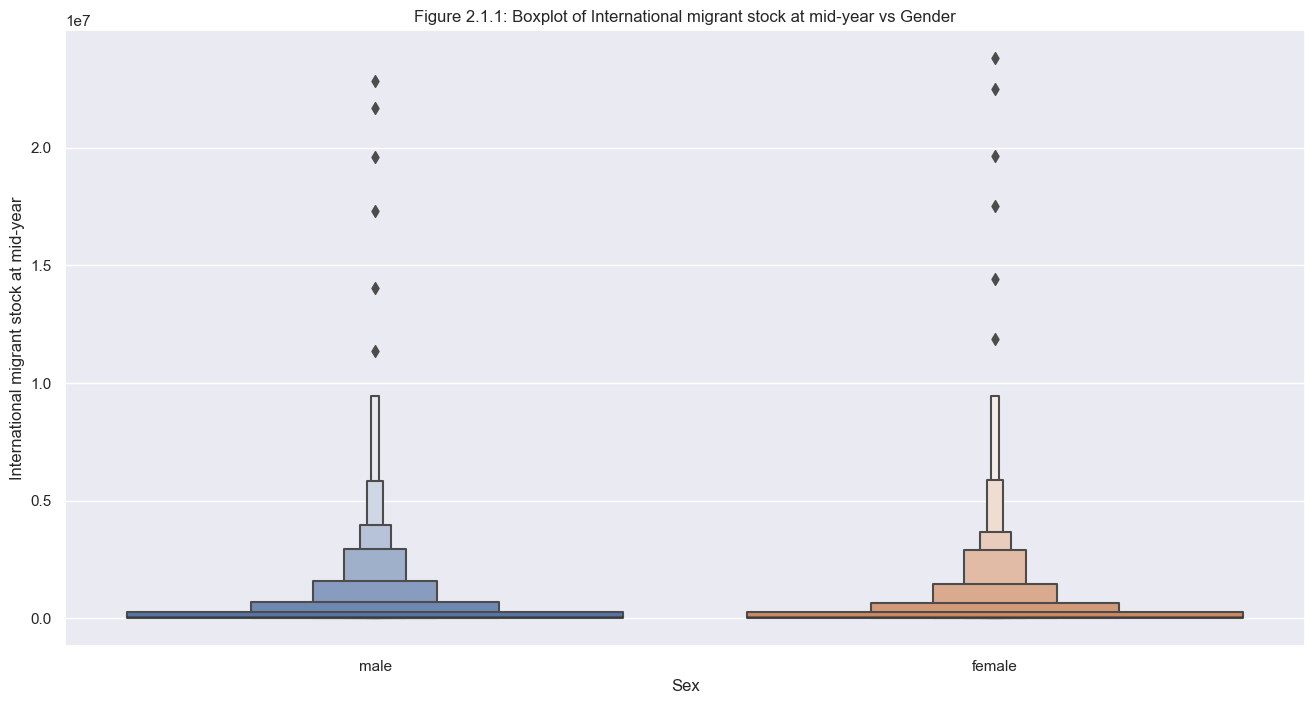

In [49]:
#2.1.1 Find trends in data - International migrant stock level between different gender
sns.set()
plt.figure(figsize=(16,8))
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet1_countryonly = tidy_data_sheet1.loc[~tidy_data_sheet1['Major area, region, country or area of destination'].isin(sum_list)]


gender = ["male", "female"]
gender_sheet1= tidy_data_sheet1_countryonly.loc[tidy_data_sheet1_countryonly["Sex"].isin(gender)]


sns.boxenplot(y='International migrant stock at mid-year', x='Sex', data=gender_sheet1)
plt.title('Figure 2.1.1: Boxplot of International migrant stock at mid-year vs Gender')
plt.show()

#Using the boxplot does not show enough information regarding the trend of data 
#Will not be included

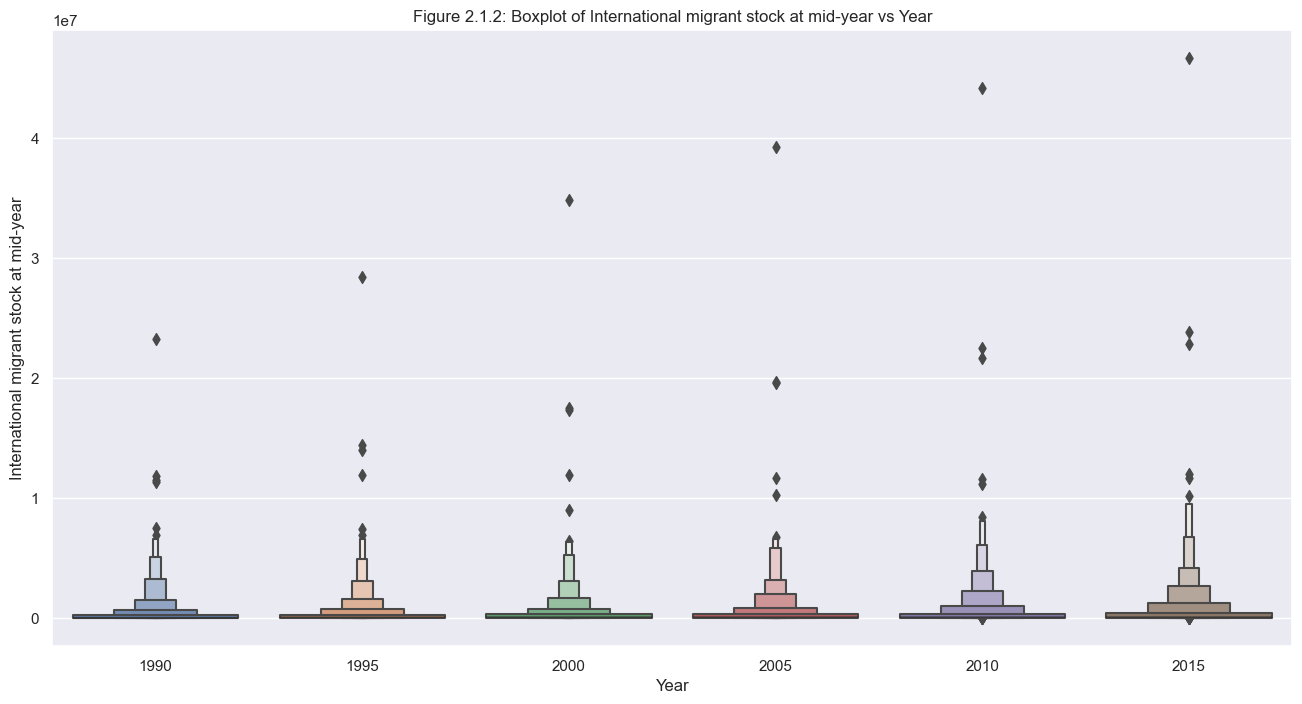

In [62]:
#2.1.2 Find trends in data - International migrant stock level among different Year
sns.set()
plt.figure(figsize=(16,8))
sns.boxenplot(y='International migrant stock at mid-year', x='Year', data=tidy_data_sheet1_countryonly)
plt.title('Figure 2.1.2: Boxplot of International migrant stock at mid-year vs Year')
plt.show()
#Plot gives information regarding trend, however we can not derive much more information than growth.
#Plot will not be included

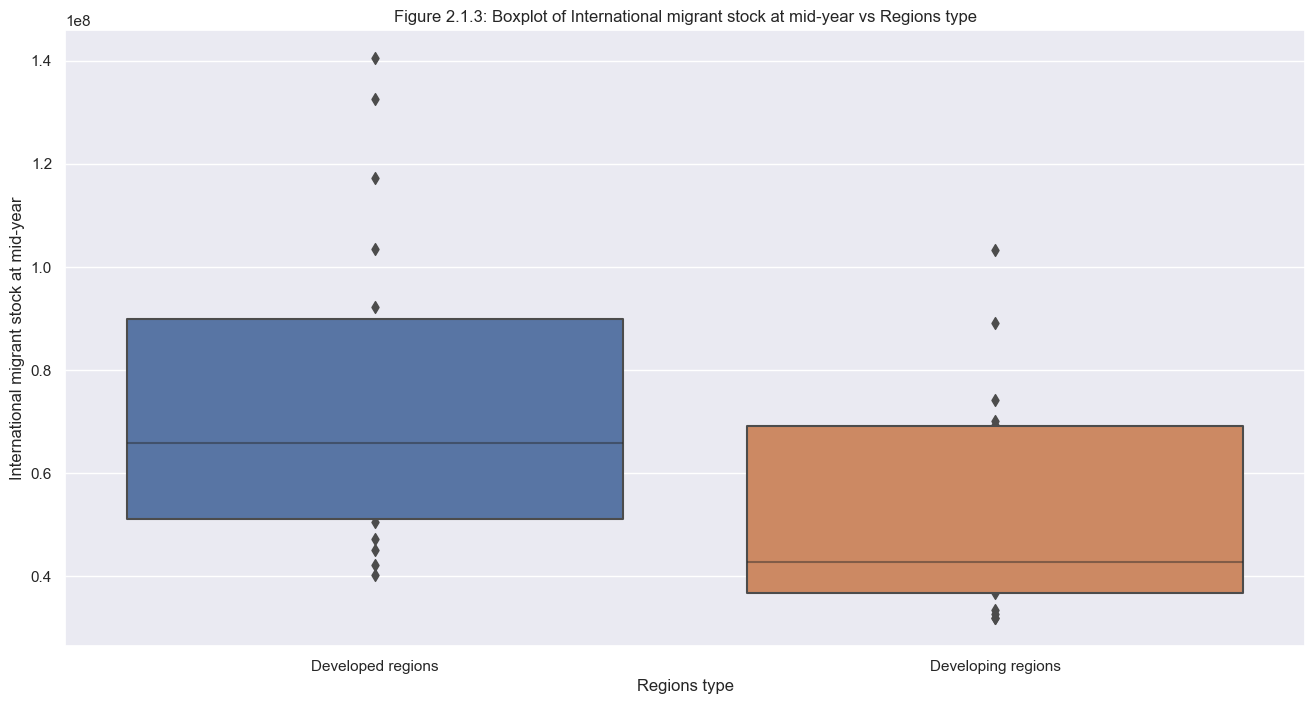

In [67]:
#2.1.3 Find trends in data - International migrant stock level between different regions
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet1= tidy_data_sheet1.loc[tidy_data_sheet1["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='International migrant stock at mid-year', data=region_sheet1)
plt.xlabel('Regions type')
plt.title('Figure 2.1.3: Boxplot of International migrant stock at mid-year vs Regions type')
plt.show()
#Base boxplot does not show growth trend or any further information
#Plot will NOT be included 

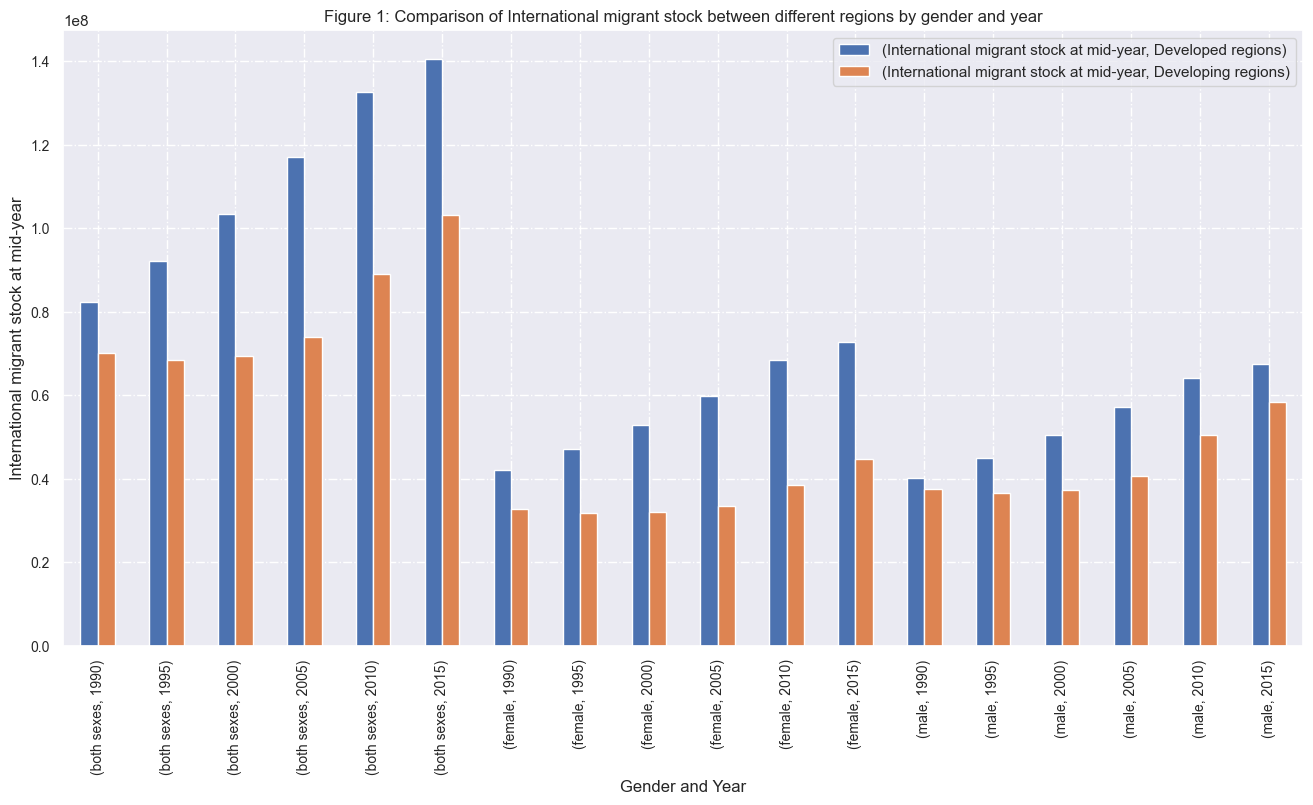

In [68]:
#2.1.4 Comparison of migrant stock between different regions by gender and year
region_sheet1_pivot = pd.pivot_table(region_sheet1, columns = ['Major area, region, country or area of destination'], index=['Sex',"Year"], values=['International migrant stock at mid-year'])
region_sheet1_pivot.plot.bar(y=['International migrant stock at mid-year'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Gender and Year")
plt.ylabel("International migrant stock at mid-year")
plt.title("Figure 1: Comparison of International migrant stock between different regions by gender and year")
plt.legend()
plt.show()
#After pivot, the bar plot shows lots of information regarding growth through years and with different genders
#Even though this may not be tidy data, but the information of the barplot is very useful
#The plot will be included thus it is renamed.

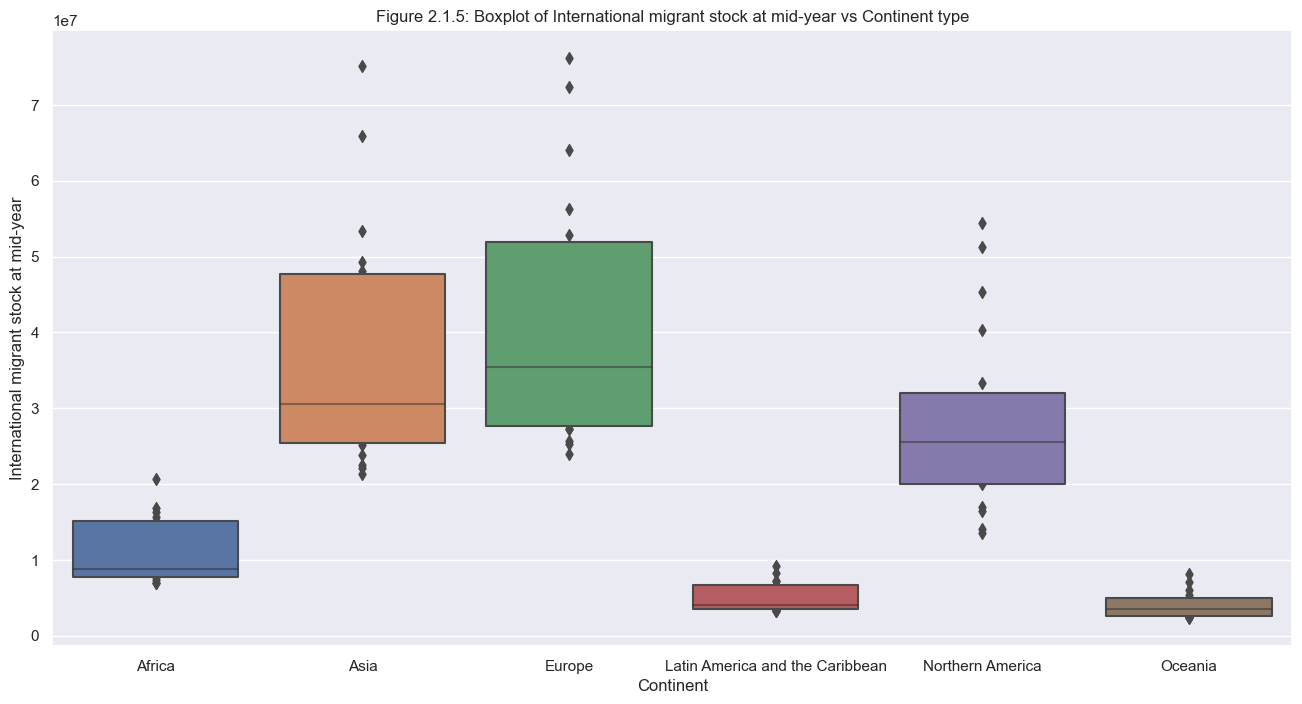

In [69]:
#2.1.5 Find trends in data - International migrant stock level among different continent
sns.set()
continent = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania","Northern America"]
continent_sheet1= tidy_data_sheet1.loc[tidy_data_sheet1["Major area, region, country or area of destination"].isin(continent)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='International migrant stock at mid-year', data=continent_sheet1)
plt.xlabel('Continent')
plt.title('Figure 2.1.5: Boxplot of International migrant stock at mid-year vs Continent type')
plt.show()
#Boxplot of international migrant stock is very nice, however, we cannot observe the rate of change 
#Thus we revert to similar pivot method as above. 

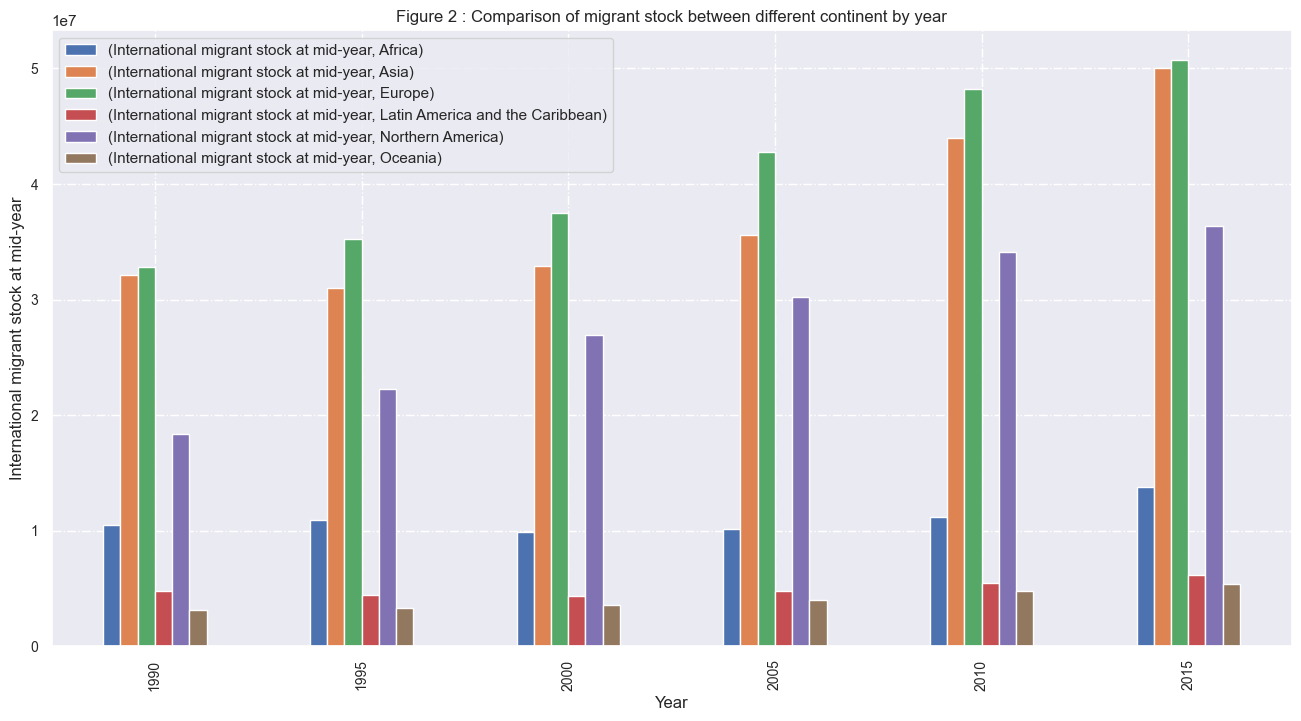

In [71]:
#2.1.6 Comparison of migrant stock between different continent by year
#After pivot, we have variable year and migrant stock from each continent. 
continent_sheet1_pivot_year = pd.pivot_table(continent_sheet1, columns = ['Major area, region, country or area of destination'], index=['Year'], values=['International migrant stock at mid-year'])
continent_sheet1_pivot_year.plot.bar(y=['International migrant stock at mid-year'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("International migrant stock at mid-year")
plt.title("Figure 2 : Comparison of migrant stock between different continent by year")
plt.legend()
plt.show()
#Shows trend accross continents through years 
#Only downside is that it may have TOO much information
#But I like what it portrays, included as Figure 2

### 2.2 SHEET 2 Total population at mid-year (thousands)

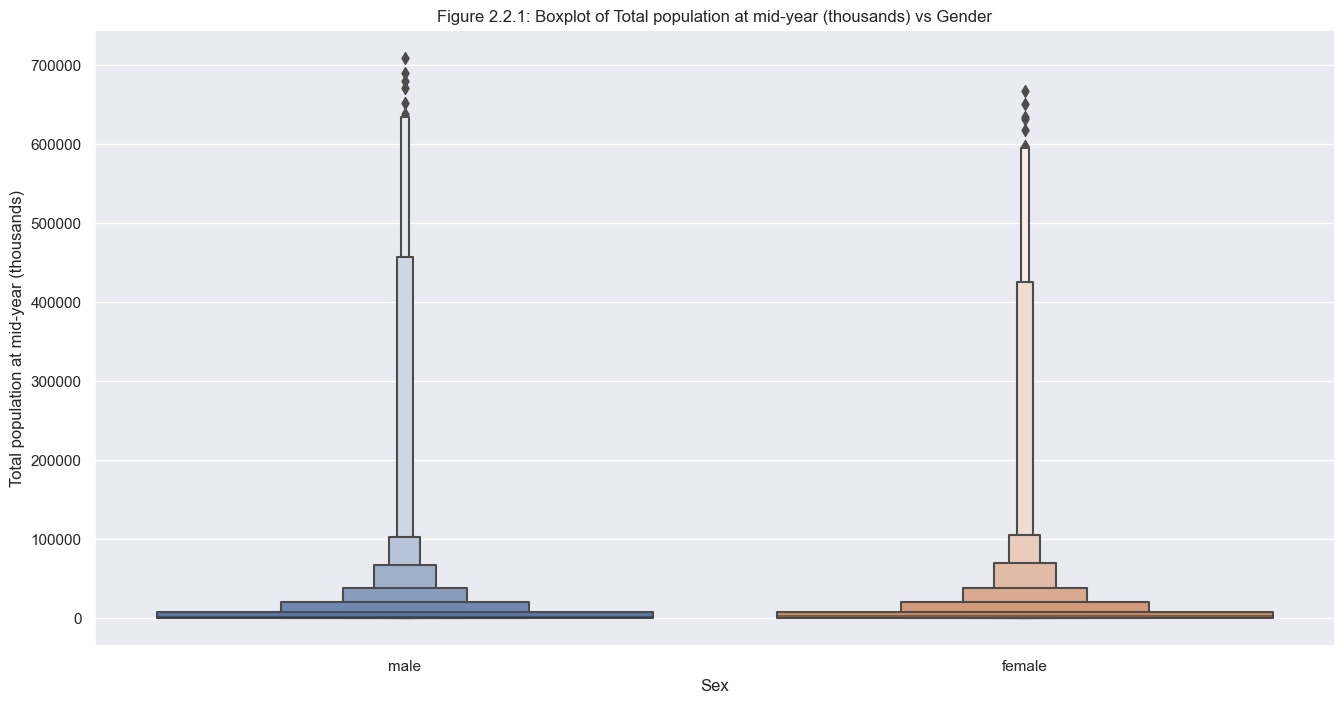

In [76]:
#2.2.1 Find trends in data - Total population at mid-year between gender
sns.set()
plt.figure(figsize=(16,8))
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet2_countryonly = tidy_data_sheet2.loc[~tidy_data_sheet2['Major area, region, country or area of destination'].isin(sum_list)]

gender = ["male", "female"]
gender_sheet2= tidy_data_sheet2_countryonly.loc[tidy_data_sheet2_countryonly["Sex"].isin(gender)]
sns.boxenplot(y='Total population at mid-year (thousands)', x="Sex", data=gender_sheet2)
#plt.xticks(rotation=45)
plt.title('Figure 2.2.1: Boxplot of Total population at mid-year (thousands) vs Gender')
plt.show()
#No trend, need to evaluate years

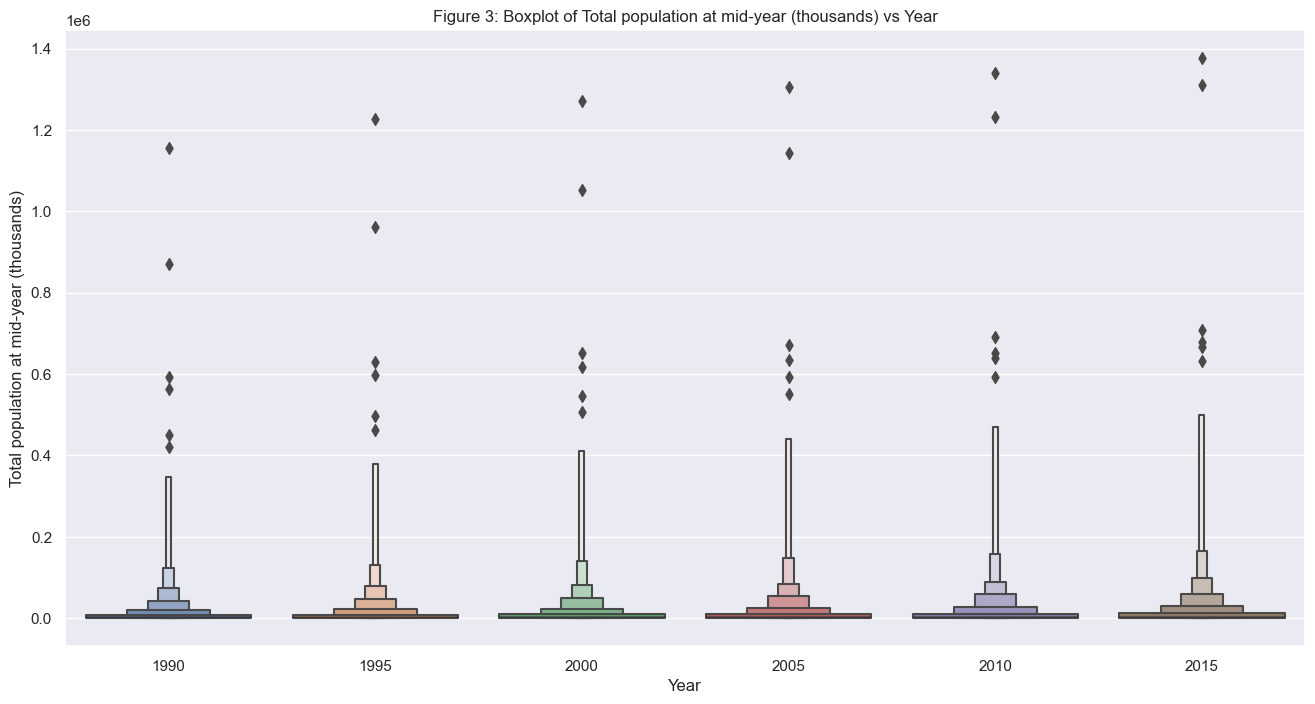

In [77]:
#2.2.2 Find trends in data - Total population at mid-year among different Year
sns.set()
plt.figure(figsize=(16,8))
sns.boxenplot(y='Total population at mid-year (thousands)', x='Year', data=tidy_data_sheet2_countryonly)
#plt.xticks(rotation=45)
plt.title('Figure 3: Boxplot of Total population at mid-year (thousands) vs Year')
plt.show()
#Figure 3 is useful in the case that it demonstrates the population growth through years and it shows 
#the major growth in the top 2 countries (China & India)

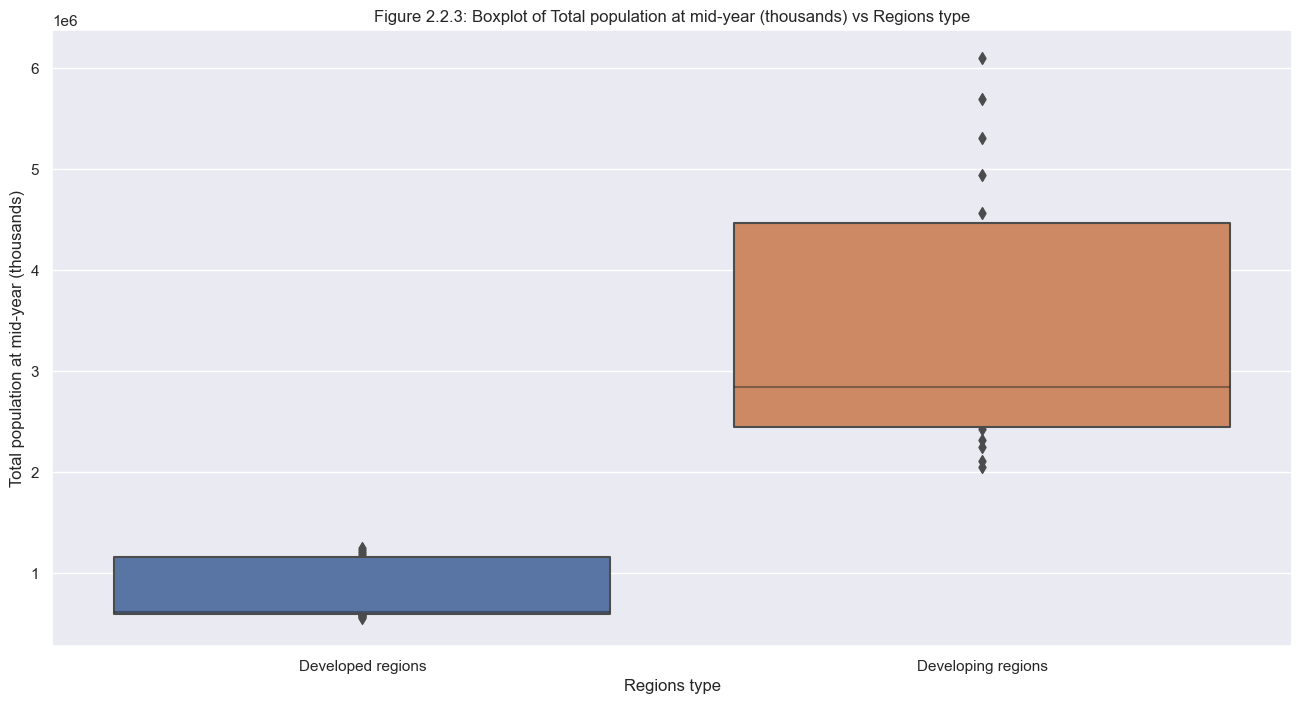

In [78]:
#2.2.3 Find trends in data - Total population at mid-year between different regions
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet2= tidy_data_sheet2.loc[tidy_data_sheet2["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Total population at mid-year (thousands)', data=region_sheet2)
plt.xlabel('Regions type')
plt.title('Figure 2.2.3: Boxplot of Total population at mid-year (thousands) vs Regions type')
plt.show()
#Not as useful since the data is aggregated

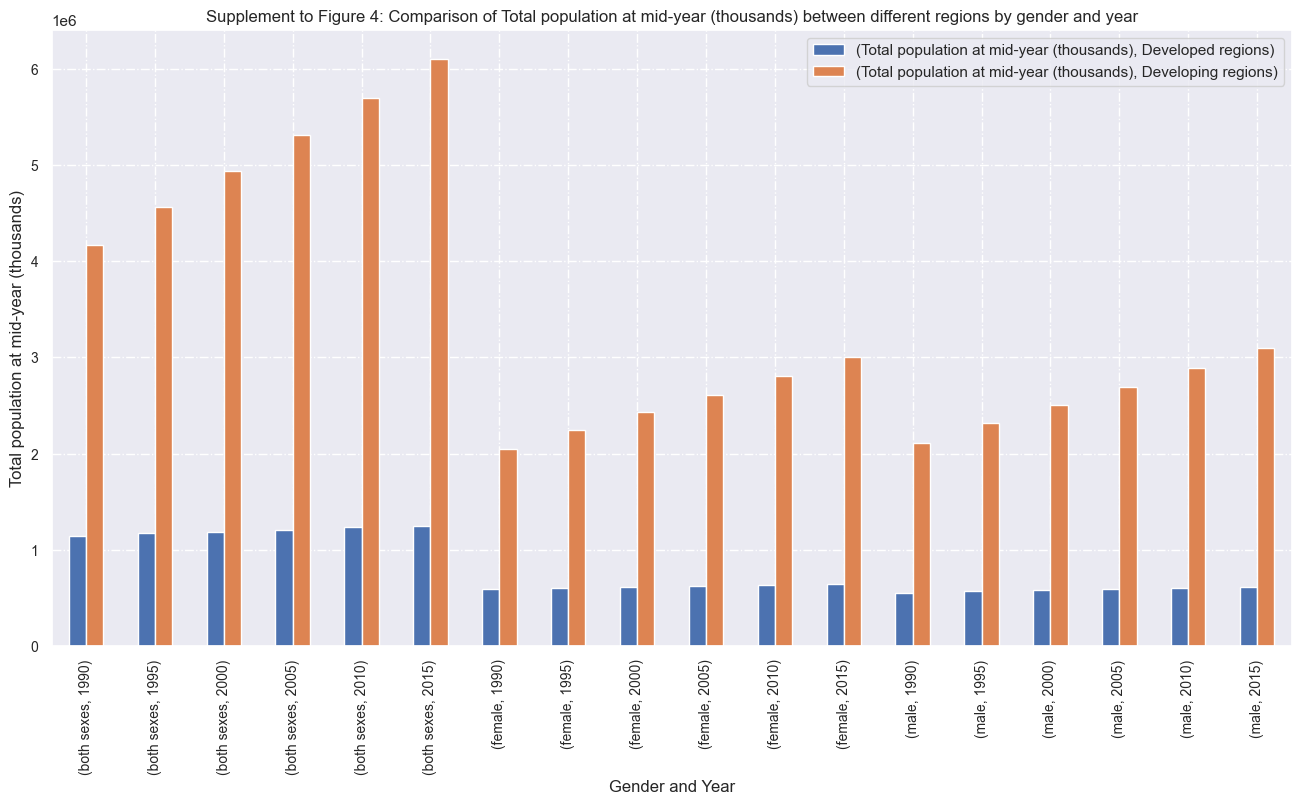

In [87]:
#2.2.4 Comparison of Total population at mid-year between different regions by gender and year
#Using the same pivot from previous we pivotted gender and year
region_sheet2_pivot = pd.pivot_table(region_sheet2, columns = ['Major area, region, country or area of destination'], index=['Sex',"Year"], values=['Total population at mid-year (thousands)'])
region_sheet2_pivot.plot.bar(y=['Total population at mid-year (thousands)'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Gender and Year")
plt.ylabel("Total population at mid-year (thousands)")
plt.title("Supplement to Figure 4: Comparison of Total population at mid-year (thousands) between different regions by gender and year")
plt.legend()
plt.show()
#Very informative plot, however it violates tidy data principle which is not ideal
#upon observation, we dont see a major need to include all genders as the increase is almost identical.
#However, wee will include this in appendix as supplementation to figure 4

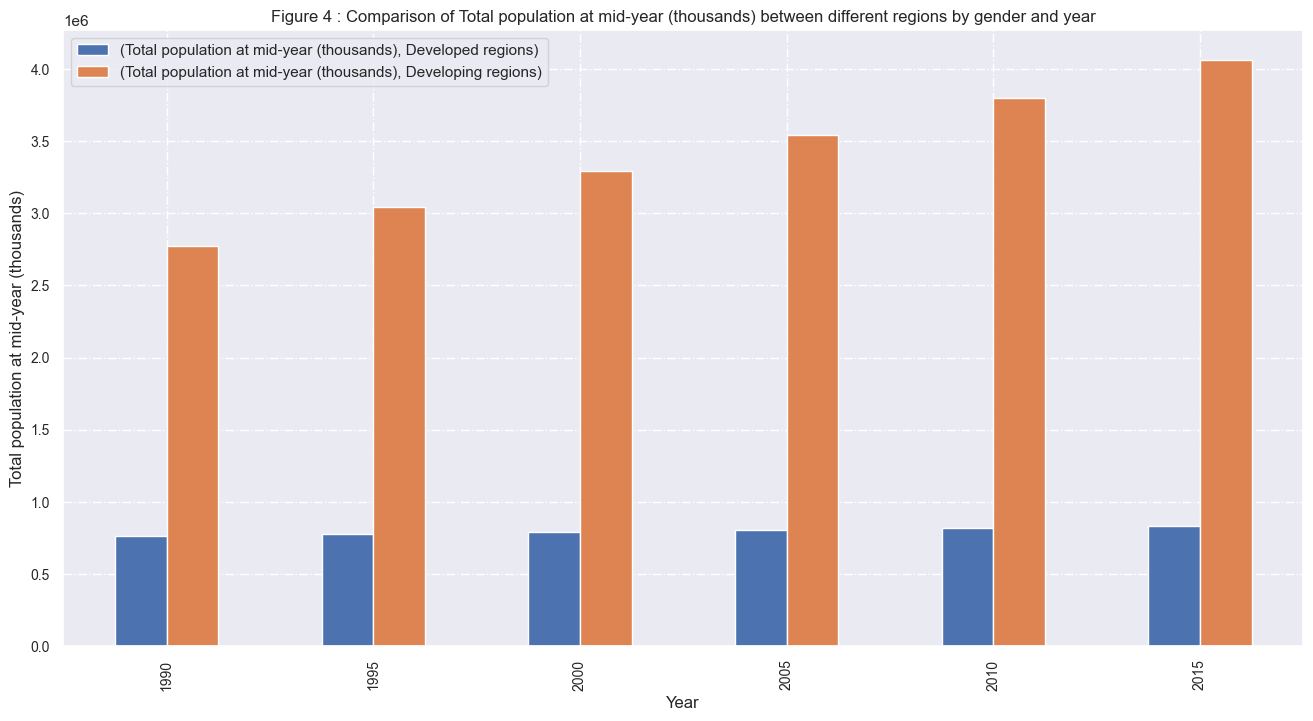

In [86]:
#2.2.5 Comparison of Total population at mid-year between different regions by  year
region_sheet2_pivot2 = pd.pivot_table(region_sheet2, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Total population at mid-year (thousands)'])
region_sheet2_pivot2.plot.bar(y=['Total population at mid-year (thousands)'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Total population at mid-year (thousands)")
plt.title("Figure 4 : Comparison of Total population at mid-year (thousands) between different regions by gender and year")
plt.legend()
plt.show()

### 2.3 SHEET 3 International migrant stock as a percentage of the total population 

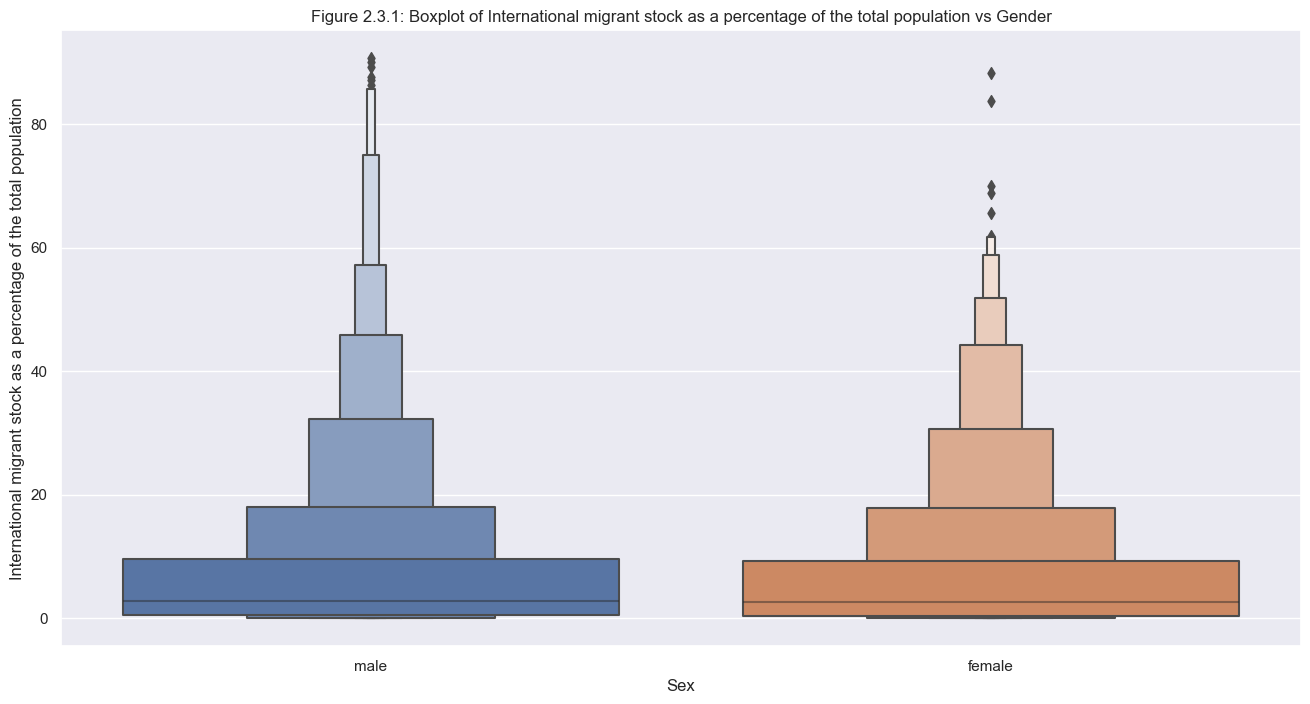

In [89]:
#2.3.1 Find trends in data - International migrant stock as a percentage of the total population between gender
sns.set()
plt.figure(figsize=(16,8))
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet3_countryonly = tidy_data_sheet3.loc[~tidy_data_sheet3['Major area, region, country or area of destination'].isin(sum_list)]

gender = ["male", "female"]
gender_sheet3= tidy_data_sheet3_countryonly.loc[tidy_data_sheet3_countryonly["Sex"].isin(gender)]
sns.boxenplot(y='International migrant stock as a percentage of the total population', x="Sex", data=gender_sheet3)
#plt.xticks(rotation=45)
plt.title('Figure 2.3.1: Boxplot of International migrant stock as a percentage of the total population vs Gender')
plt.show()
#Similarily to above, aggregated data does not portray information well

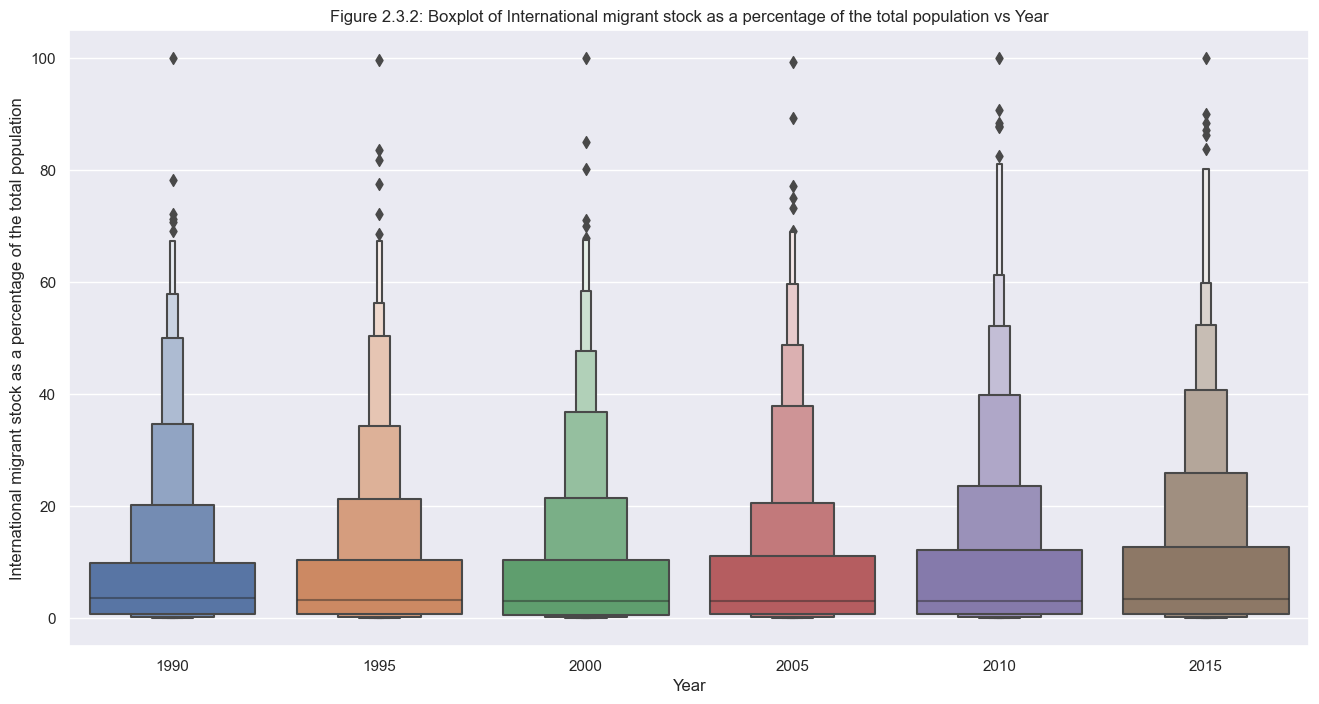

In [90]:
#2.3.2 Find trends in data - International migrant stock as a percentage of the total population among different Year
sns.set()
plt.figure(figsize=(16,8))
sns.boxenplot(y='International migrant stock as a percentage of the total population', x='Year', data=tidy_data_sheet3_countryonly)
#plt.xticks(rotation=45)
plt.title('Figure 2.3.2: Boxplot of International migrant stock as a percentage of the total population vs Year')
plt.show()
#Although separated by years, it does not show a clean trends and where the trendd is coming from 

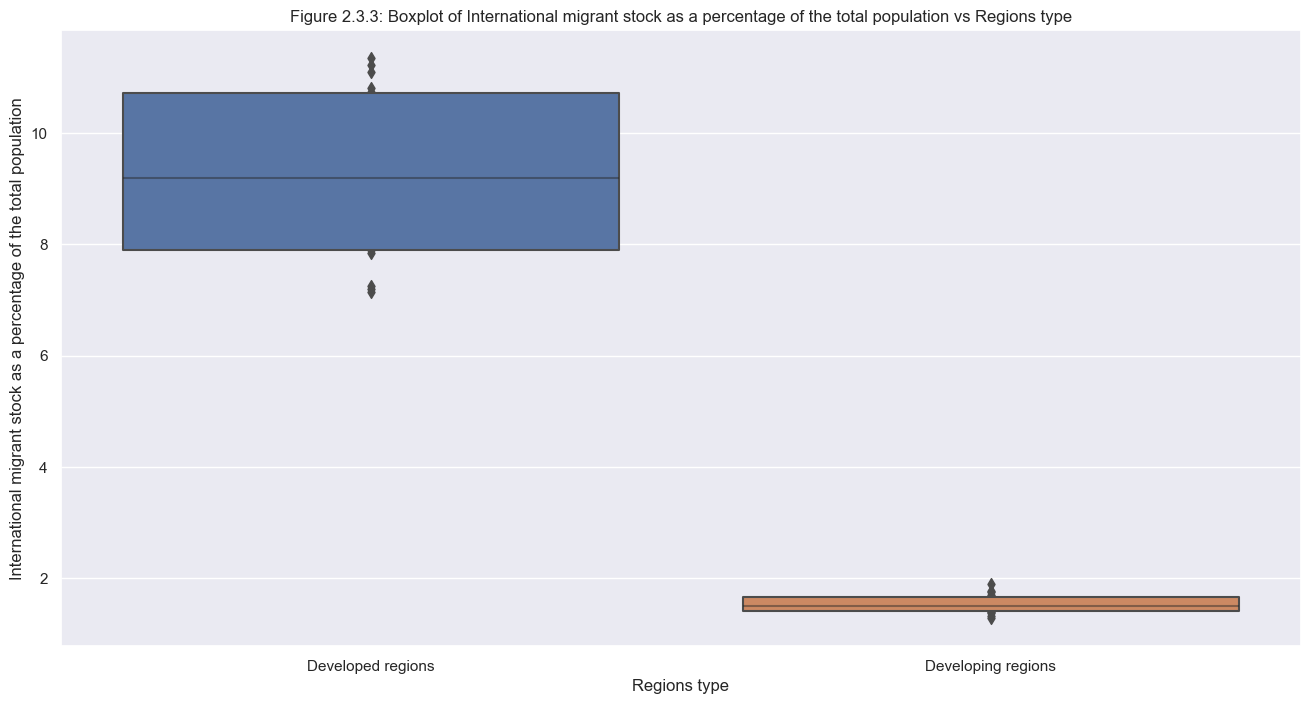

In [91]:
#2.3.3 Find trends in data - International migrant stock as a percentage of the total population between region type
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet3= tidy_data_sheet3.loc[tidy_data_sheet3["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='International migrant stock as a percentage of the total population', data=region_sheet3)
plt.xlabel('Regions type')
plt.title('Figure 2.3.3: Boxplot of International migrant stock as a percentage of the total population vs Regions type')
plt.show()

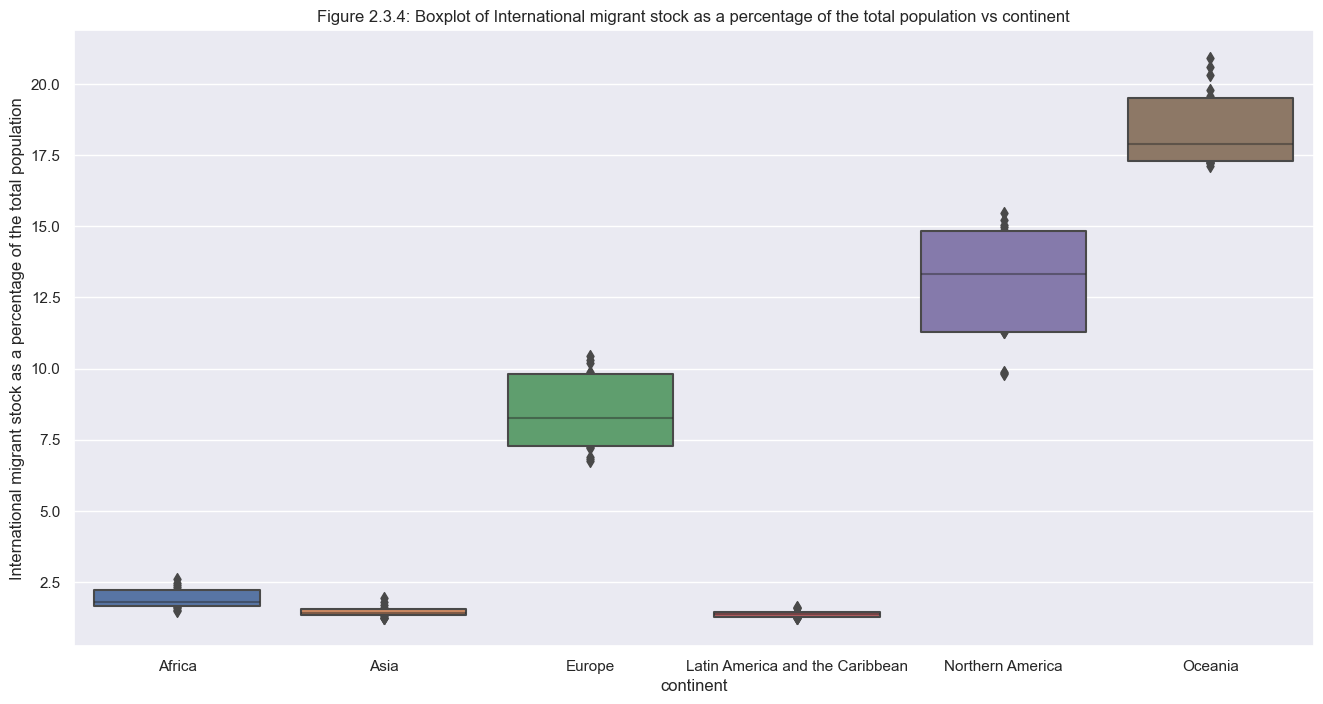

In [100]:
#2.3.4 Find trends in data - International migrant stock as a percentage of the total population among different continent
sns.set()
continent = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania","Northern America"]
continent_sheet3= tidy_data_sheet3.loc[tidy_data_sheet3["Major area, region, country or area of destination"].isin(continent)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='International migrant stock as a percentage of the total population', data=continent_sheet3)
plt.xlabel('continent')
plt.title('Figure 2.3.4: Boxplot of International migrant stock as a percentage of the total population vs continent')
plt.show()
#Boxplot, aggregated change below

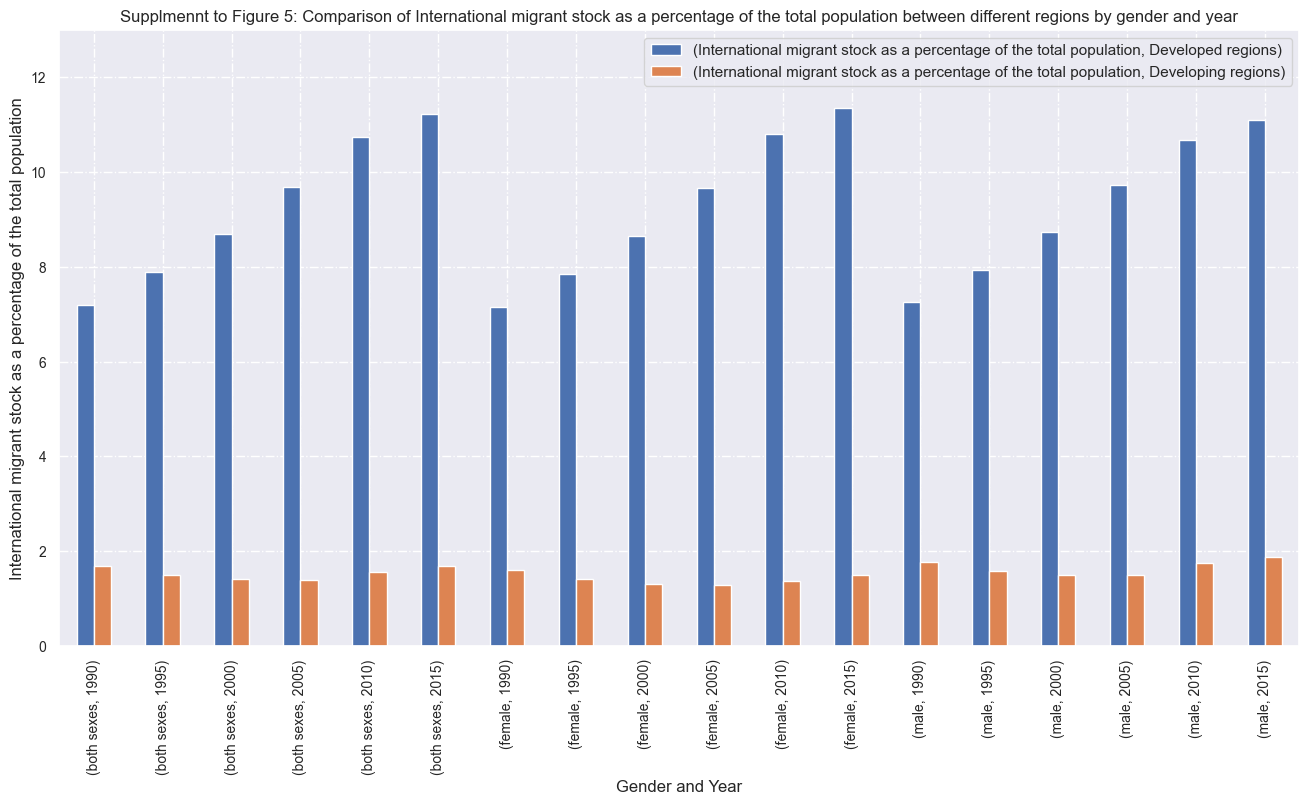

In [101]:
#2.3.5 Comparison of International migrant stock as a percentage of the total population between different regions by gender and year
region_sheet3_pivot = pd.pivot_table(region_sheet3, columns = ['Major area, region, country or area of destination'], index=['Sex',"Year"], values=['International migrant stock as a percentage of the total population'])
region_sheet3_pivot.plot.bar(y=['International migrant stock as a percentage of the total population'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.ylim(0,13)
plt.xlabel("Gender and Year")
plt.ylabel("International migrant stock as a percentage of the total population")
plt.title("Supplmennt to Figure 5: Comparison of International migrant stock as a percentage of the total population between different regions by gender and year")
plt.legend()
plt.show()
#Very informative plot, but similar to plot 4 a little bit redundant, will be included in Appendix as supplement 

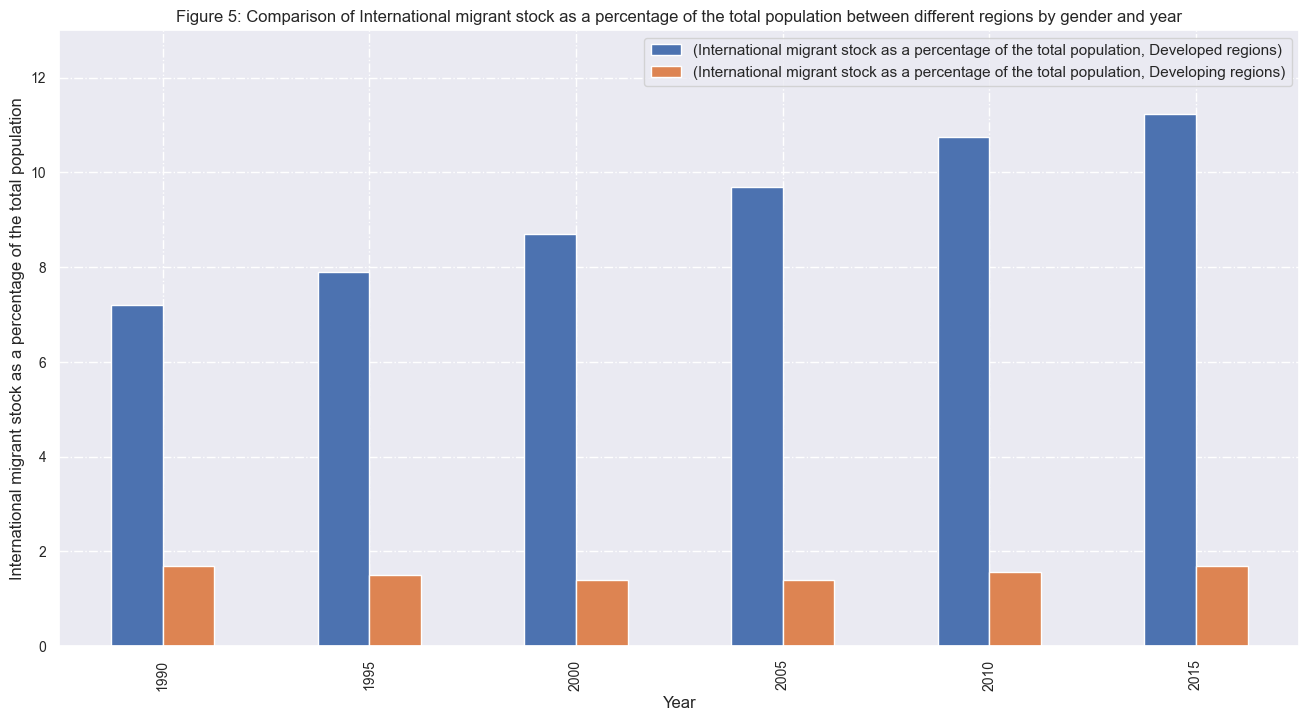

In [102]:
#2.3.6 Comparison of International migrant stock as a percentage of the total population between different regions by gender and year
region_sheet3_pivot = pd.pivot_table(region_sheet3, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['International migrant stock as a percentage of the total population'])
region_sheet3_pivot.plot.bar(y=['International migrant stock as a percentage of the total population'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.ylim(0,13)
plt.xlabel("Year")
plt.ylabel("International migrant stock as a percentage of the total population")
plt.title("Figure 5: Comparison of International migrant stock as a percentage of the total population between different regions by gender and year")
plt.legend()
plt.show()

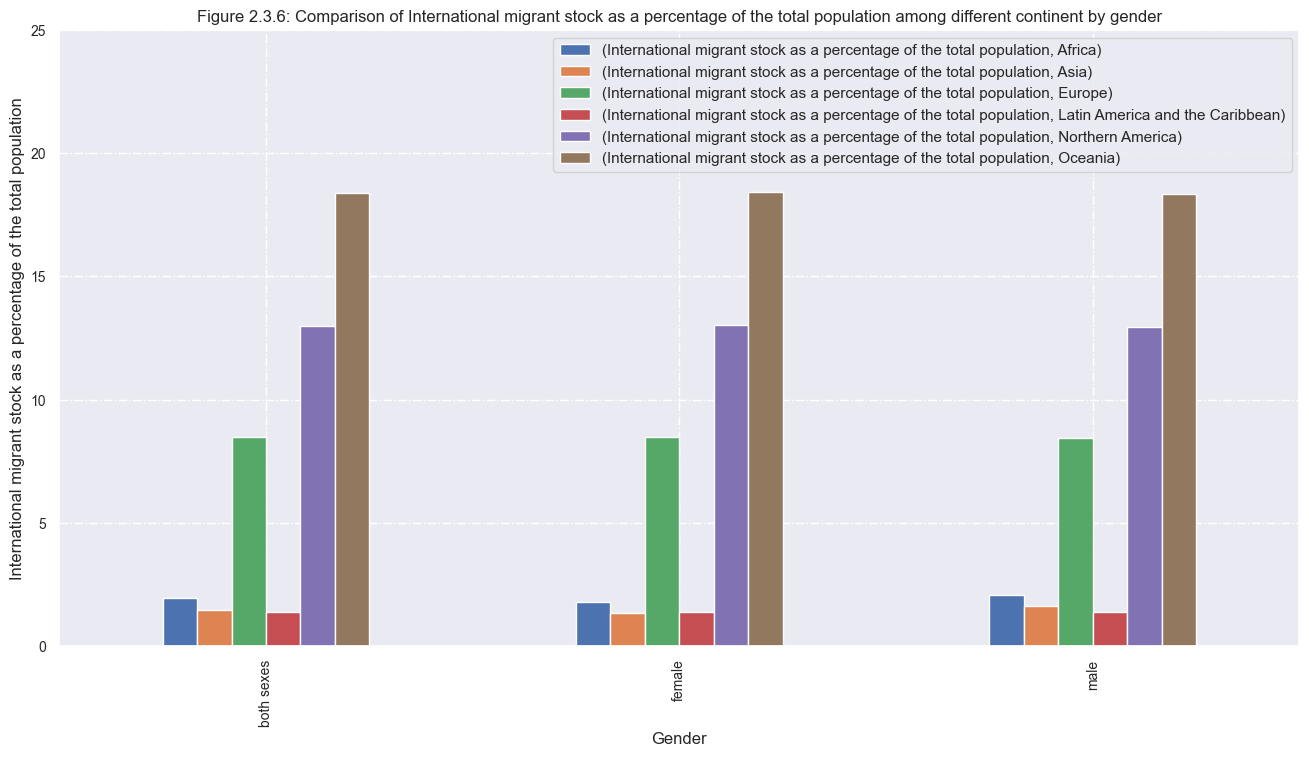

In [103]:
#2.3.6 Comparison of International migrant stock as a percentage of the total population among different continent by gender
continent_sheet3_pivot_gender = pd.pivot_table(continent_sheet3, columns = ['Major area, region, country or area of destination'], index=['Sex'], values=['International migrant stock as a percentage of the total population'])
continent_sheet3_pivot_gender.plot.bar(y=['International migrant stock as a percentage of the total population'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.ylim(0,25)
plt.xlabel("Gender")
plt.ylabel("International migrant stock as a percentage of the total population")
plt.title("Figure 2.3.6: Comparison of International migrant stock as a percentage of the total population among different continent by gender")
plt.legend()
plt.show()
#Aggregated data can not tell accurate stories 

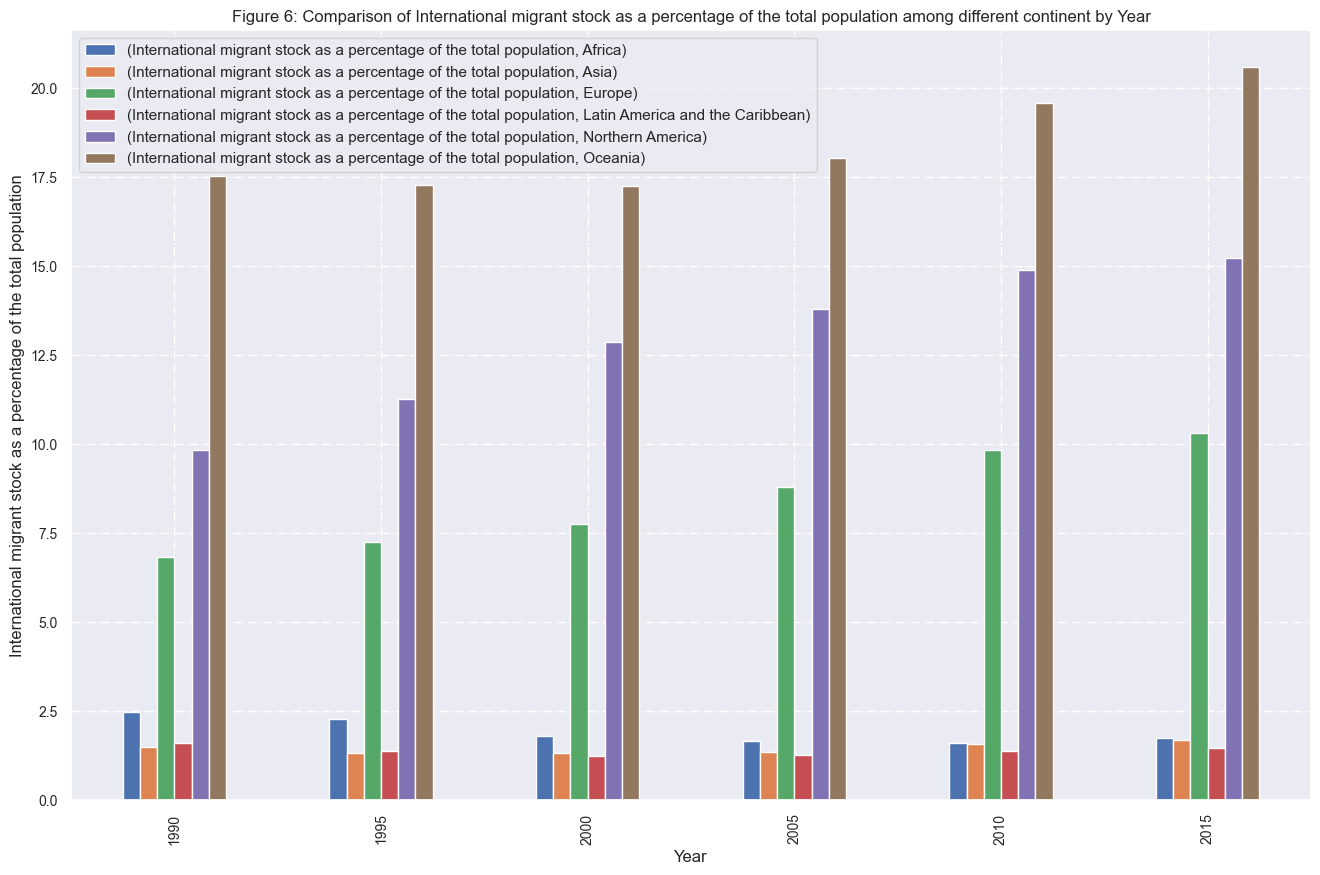

In [105]:
#2.3.7 Comparison of International migrant stock as a percentage of the total population among different continent by year
continent_sheet3_pivot_year = pd.pivot_table(continent_sheet3, columns = ['Major area, region, country or area of destination'], index=['Year'], values=['International migrant stock as a percentage of the total population'])
continent_sheet3_pivot_year.plot.bar(y=['International migrant stock as a percentage of the total population'], figsize=(16,10), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("International migrant stock as a percentage of the total population")
plt.title("Figure 6: Comparison of International migrant stock as a percentage of the total population among different continent by Year")
plt.legend()
plt.show()
#Informative figure to see which continents are becoming more diverse
#Input as figure 6

### 2.4 SHEET 4 Female migrants as a percentage of the international migrant stock

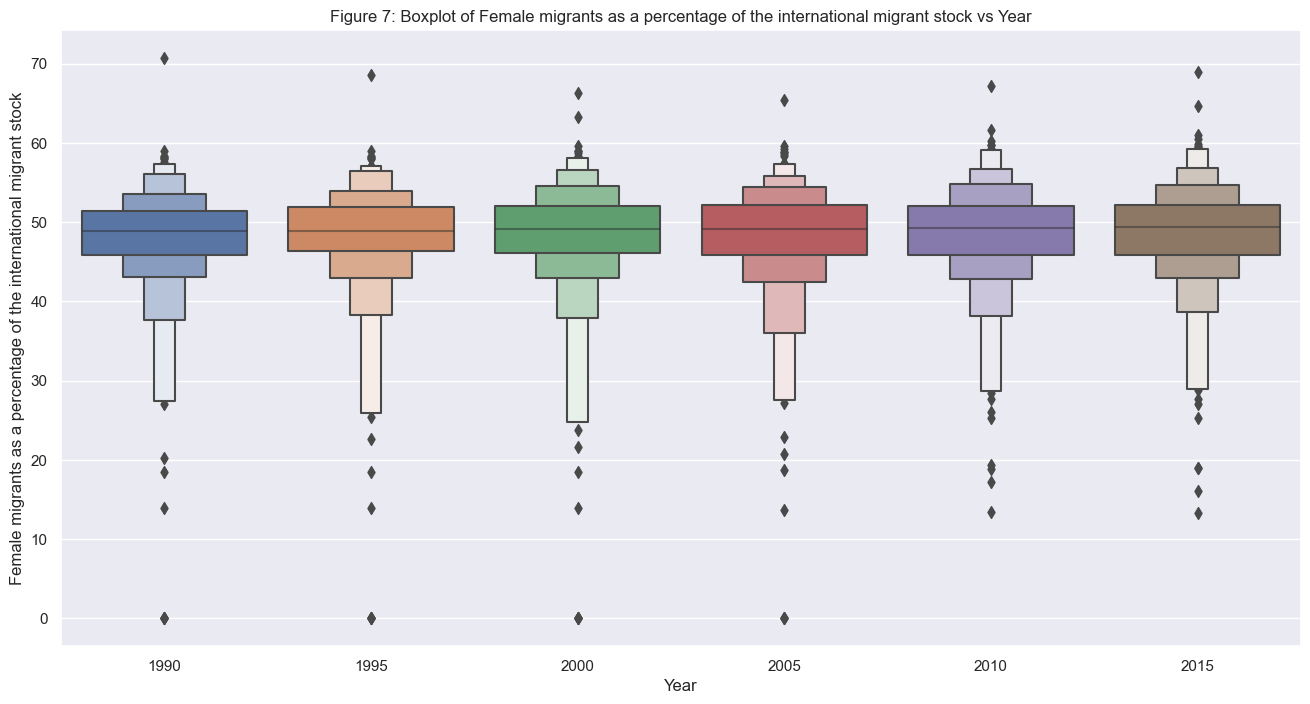

In [106]:
#2.4.1 Find trends in data - Female migrants as a percentage of the international migrant stock among different year
sns.set()
plt.figure(figsize=(16,8))
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet4_countryonly = tidy_data_sheet4.loc[~tidy_data_sheet4['Major area, region, country or area of destination'].isin(sum_list)]

sns.boxenplot(y='Female migrants as a percentage of the international migrant stock', x='Year', data=tidy_data_sheet4_countryonly)
#plt.xticks(rotation=45)
plt.title('Figure 7: Boxplot of Female migrants as a percentage of the international migrant stock vs Year')
plt.show()
#Informative boxplot showing the data we want. 

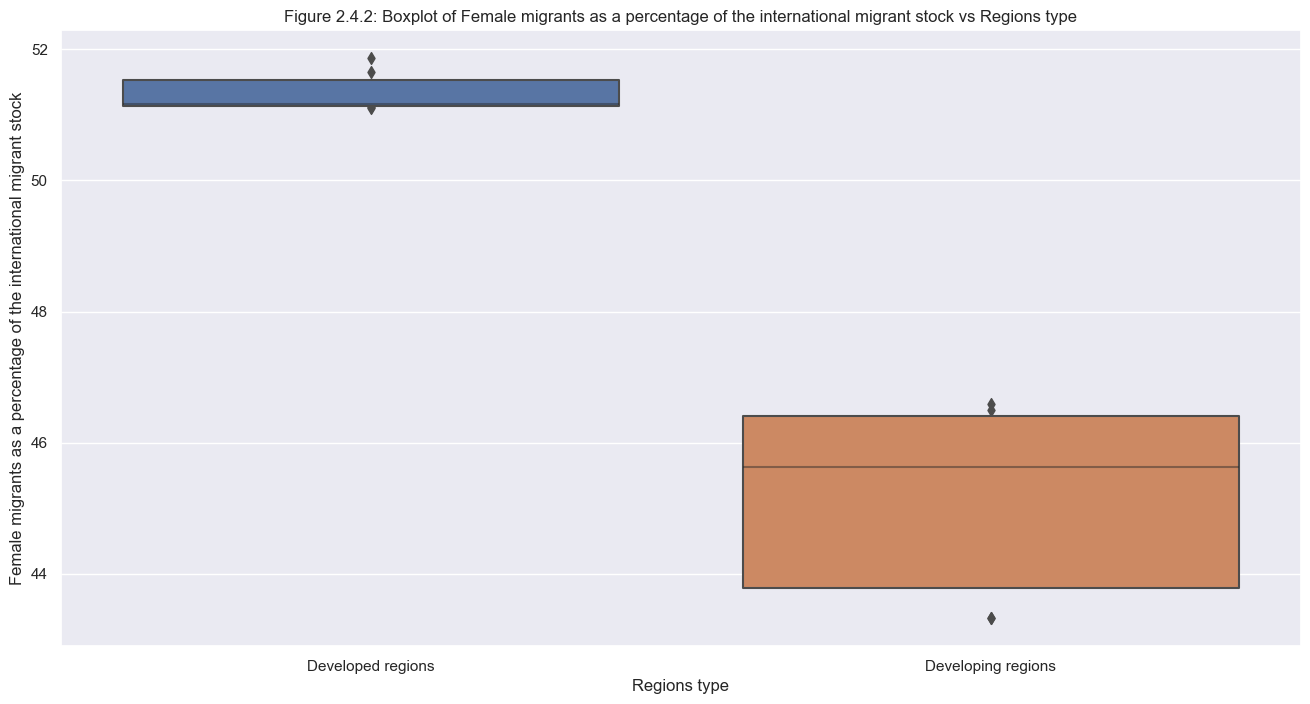

In [107]:
#2.4.2 Find trends in data - Female migrants as a percentage of the international migrant stock between region type
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet4= tidy_data_sheet4.loc[tidy_data_sheet4["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Female migrants as a percentage of the international migrant stock', data=region_sheet4)
plt.xlabel('Regions type')
plt.title('Figure 2.4.2: Boxplot of Female migrants as a percentage of the international migrant stock vs Regions type')
plt.show()
#Interesting discrepancy between female migrant and regions
#Aggregated data needs to be seaparated by year

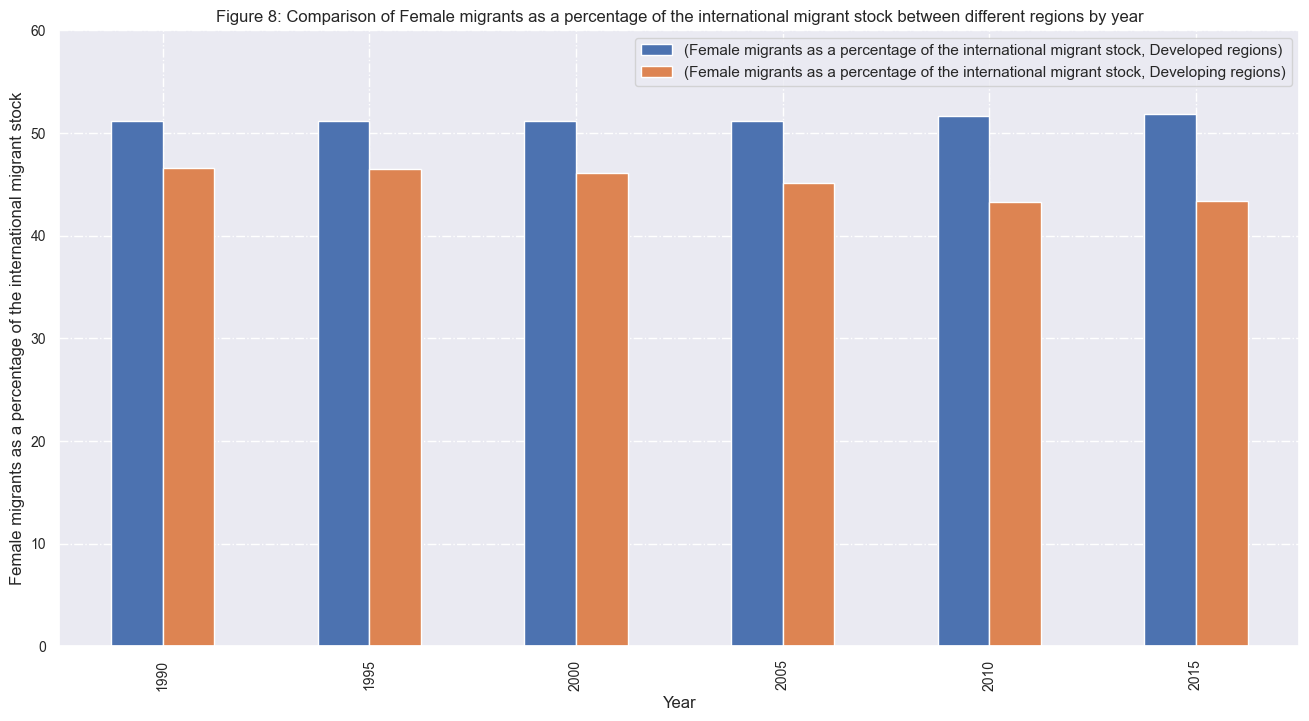

In [108]:
#2.4.3 Comparison of Female migrants as a percentage of the international migrant stock between different regions by year
region_sheet4_pivot = pd.pivot_table(region_sheet4, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Female migrants as a percentage of the international migrant stock'])
region_sheet4_pivot.plot.bar(y=['Female migrants as a percentage of the international migrant stock'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylim(0,60)
plt.ylabel("Female migrants as a percentage of the international migrant stock")
plt.title("Figure 8: Comparison of Female migrants as a percentage of the international migrant stock between different regions by year")
plt.legend()
plt.show()
#Very informative barplot on the growing discrepancy of female migrant preference, included as figure 8

### 2.5 SHEET 5 Annual rate of change of the migrant stock 

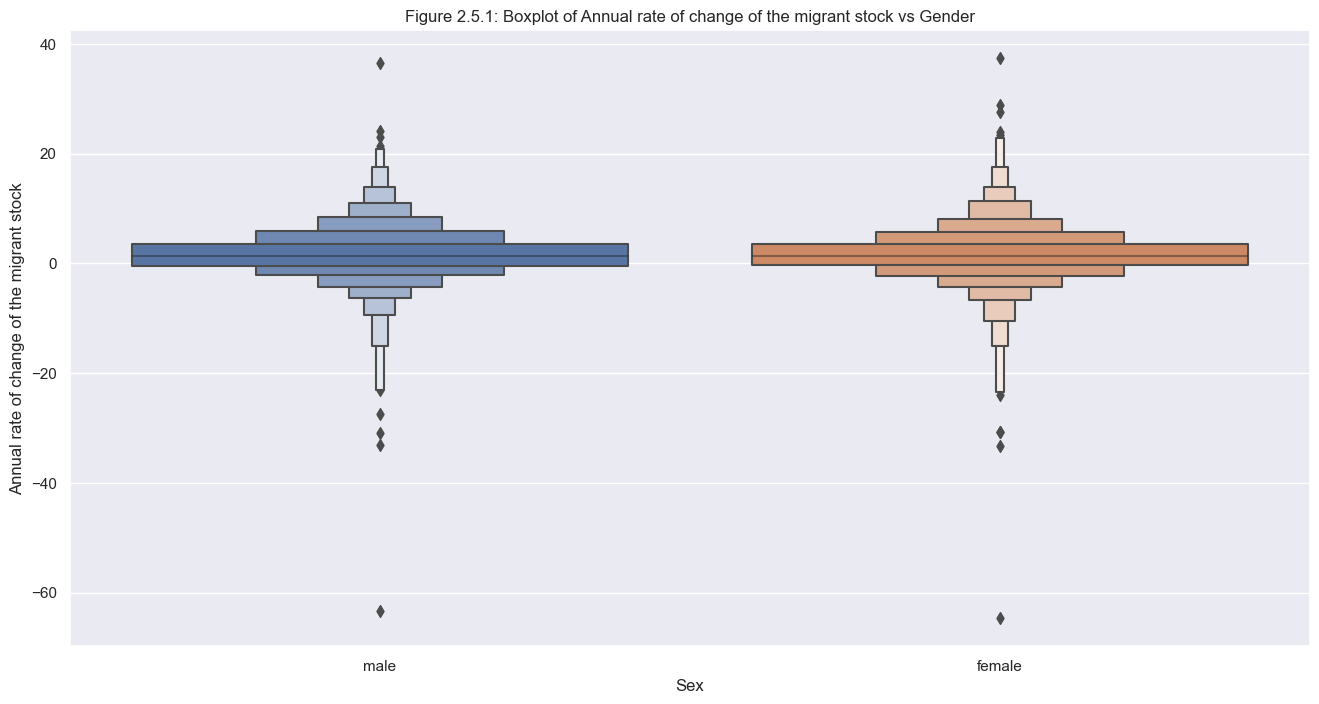

In [111]:
#2.5.1 Find trends in data - Annual rate of change of the migrant stock between gender
sns.set()
plt.figure(figsize=(16,8))
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet5_countryonly = tidy_data_sheet5.loc[~tidy_data_sheet5['Major area, region, country or area of destination'].isin(sum_list)]
gender = ["male", "female"]
gender_sheet5= tidy_data_sheet5_countryonly.loc[tidy_data_sheet5_countryonly["Sex"].isin(gender)]
sns.boxenplot(y='Annual rate of change of the migrant stock', x="Sex", data=gender_sheet5)
#plt.xticks(rotation=45)
plt.title('Figure 2.5.1: Boxplot of Annual rate of change of the migrant stock vs Gender')
plt.show()
#Less usecase for aggregated information

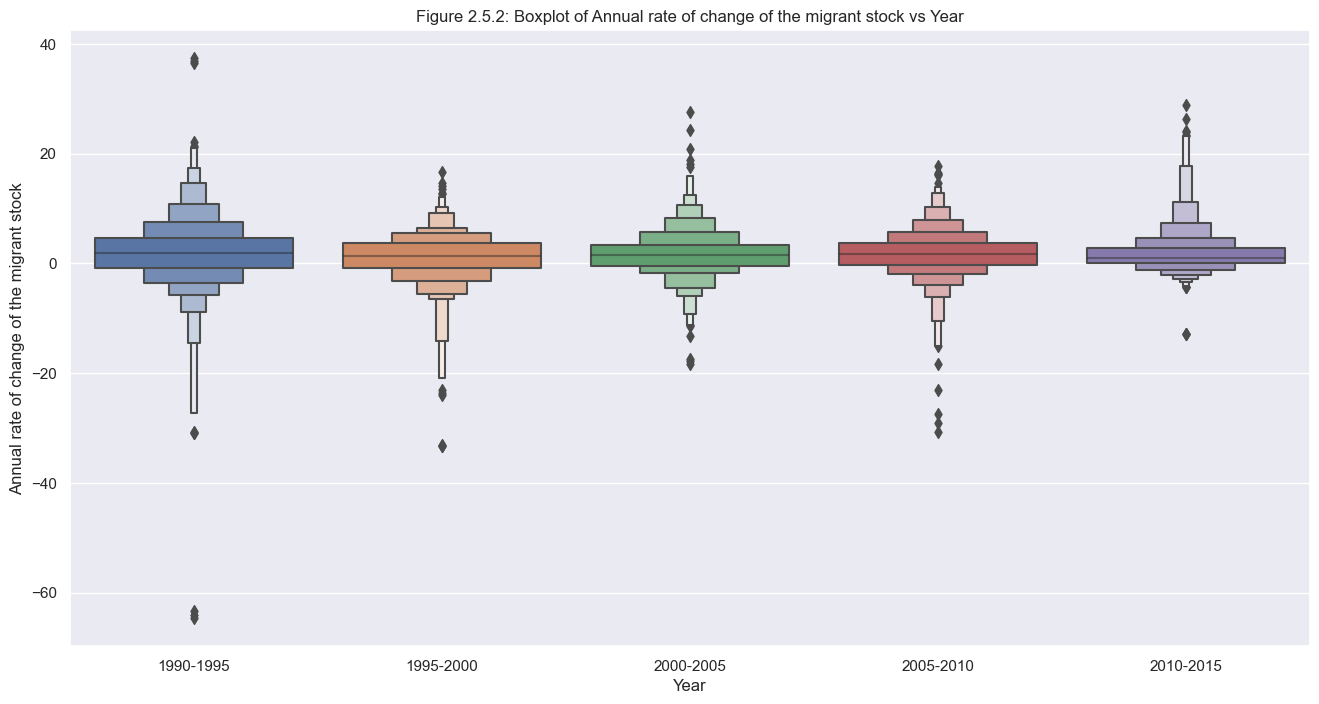

In [110]:
#2.5.2 Find trends in data - Annual rate of change of the migrant stock among different Year
sns.set()
plt.figure(figsize=(16,8))
sns.boxenplot(y='Annual rate of change of the migrant stock', x='Year', data=tidy_data_sheet5_countryonly)
#plt.xticks(rotation=45)
plt.title('Figure 2.5.2: Boxplot of Annual rate of change of the migrant stock vs Year')
plt.show()
#Mean is always above 0, at first glance its a very interesting figure but it does not portray enough information

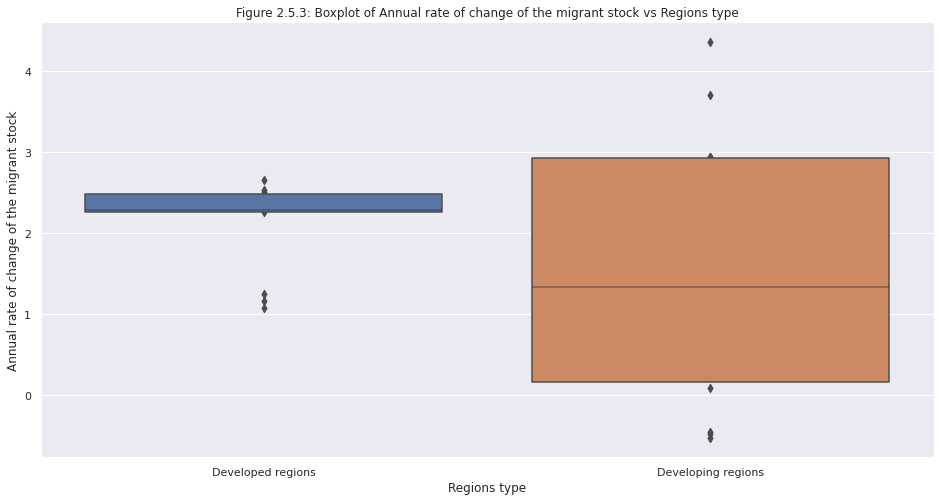

In [78]:
#2.5.3 Find trends in data - Annual rate of change of the migrant stock between region type
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet5= tidy_data_sheet5.loc[tidy_data_sheet5["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Annual rate of change of the migrant stock', data=region_sheet5)
plt.xlabel('Regions type')
plt.title('Figure 2.5.3: Boxplot of Annual rate of change of the migrant stock vs Regions type')
plt.show()
#Observing the change by regions

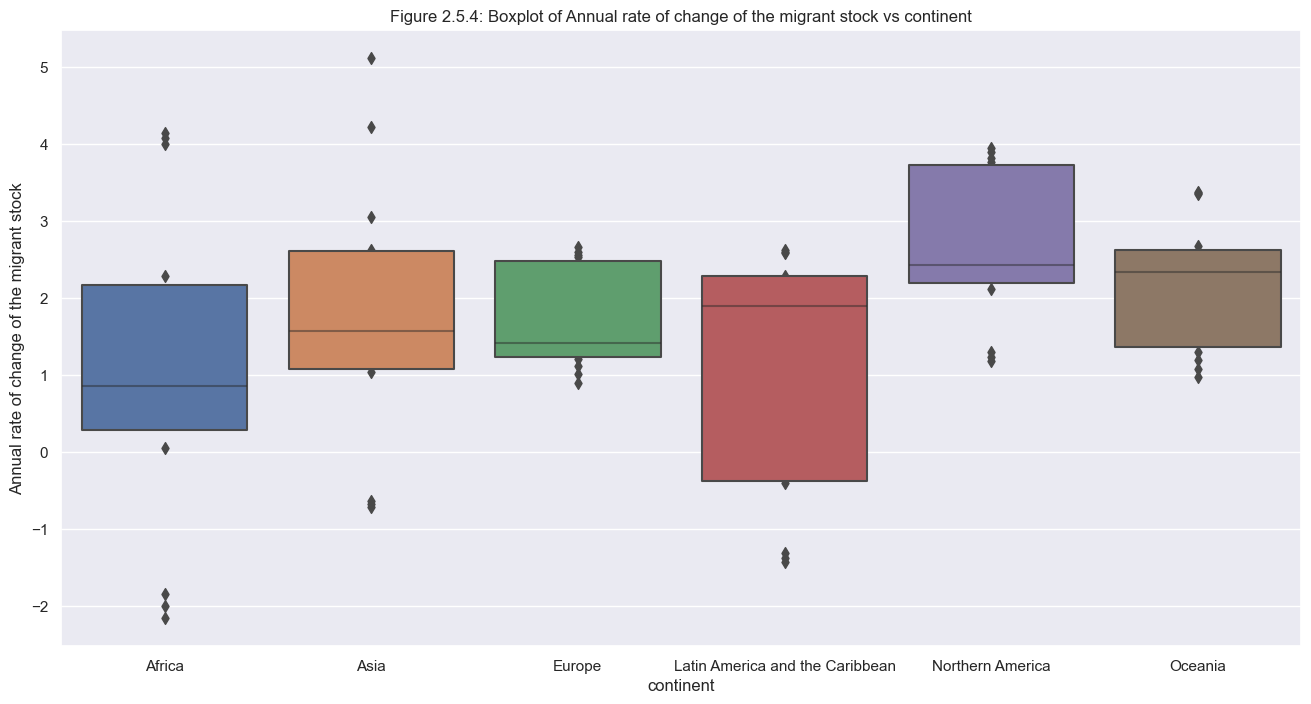

In [113]:
#2.5.4 Find trends in data - Annual rate of change of the migrant stock among different continent
sns.set()
continent = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania","Northern America"]
continent_sheet5= tidy_data_sheet5.loc[tidy_data_sheet5["Major area, region, country or area of destination"].isin(continent)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Annual rate of change of the migrant stock', data=continent_sheet5)
plt.xlabel('continent')
plt.title('Figure 2.5.4: Boxplot of Annual rate of change of the migrant stock vs continent')
plt.show()
#Observing the change by continent, if we pivot it will present a good trend graph

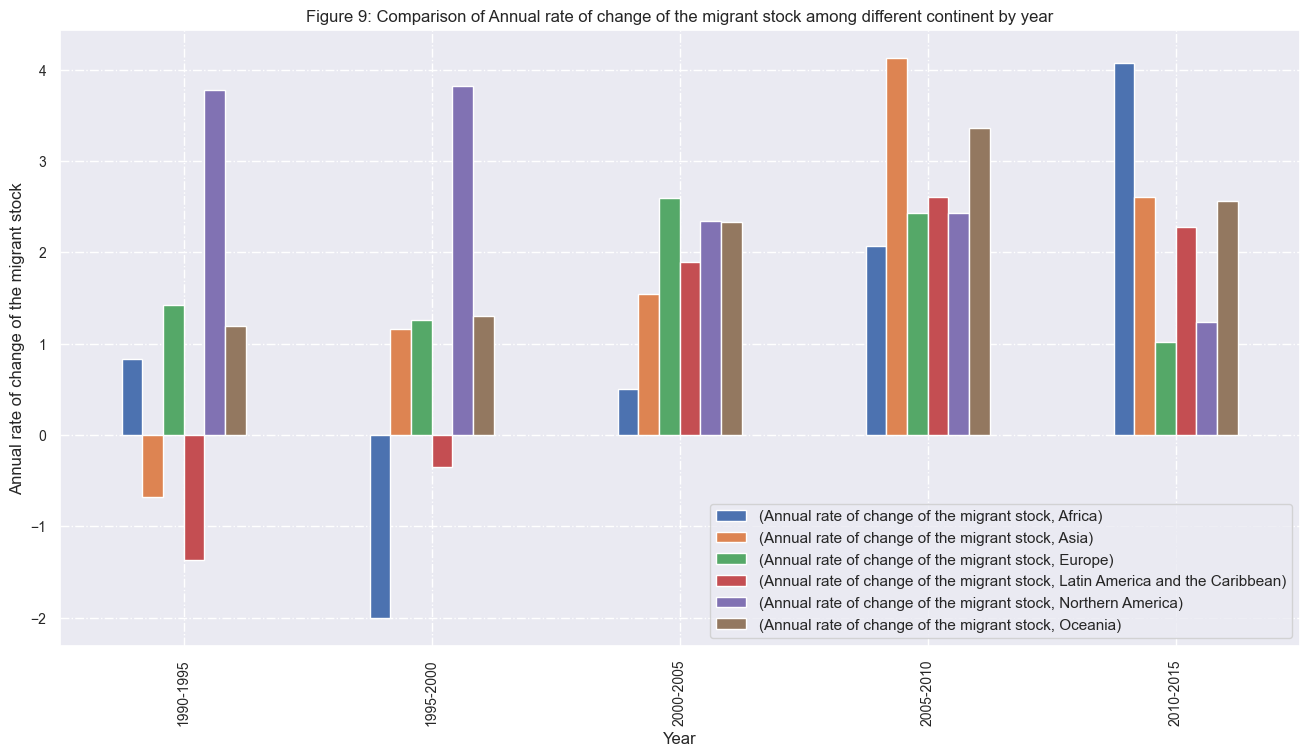

In [118]:
#2.5.5 Comparison of Annual rate of change of the migrant stock among different continent by year
continent_sheet5_pivot_year = pd.pivot_table(continent_sheet5, columns = ['Major area, region, country or area of destination'], index=['Year'], values=['Annual rate of change of the migrant stock'])
continent_sheet5_pivot_year.plot.bar(y=['Annual rate of change of the migrant stock'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Annual rate of change of the migrant stock")
plt.title("Figure 9: Comparison of Annual rate of change of the migrant stock among different continent by year")
plt.legend()
plt.show()
#We can observe the trend in rate of change of migrant stock on different continents clearly
#Can derive insights from the plot
#Included as figure 9

### 2.6 SHEET 6
####(1) Estimated refugee stock at mid-year 

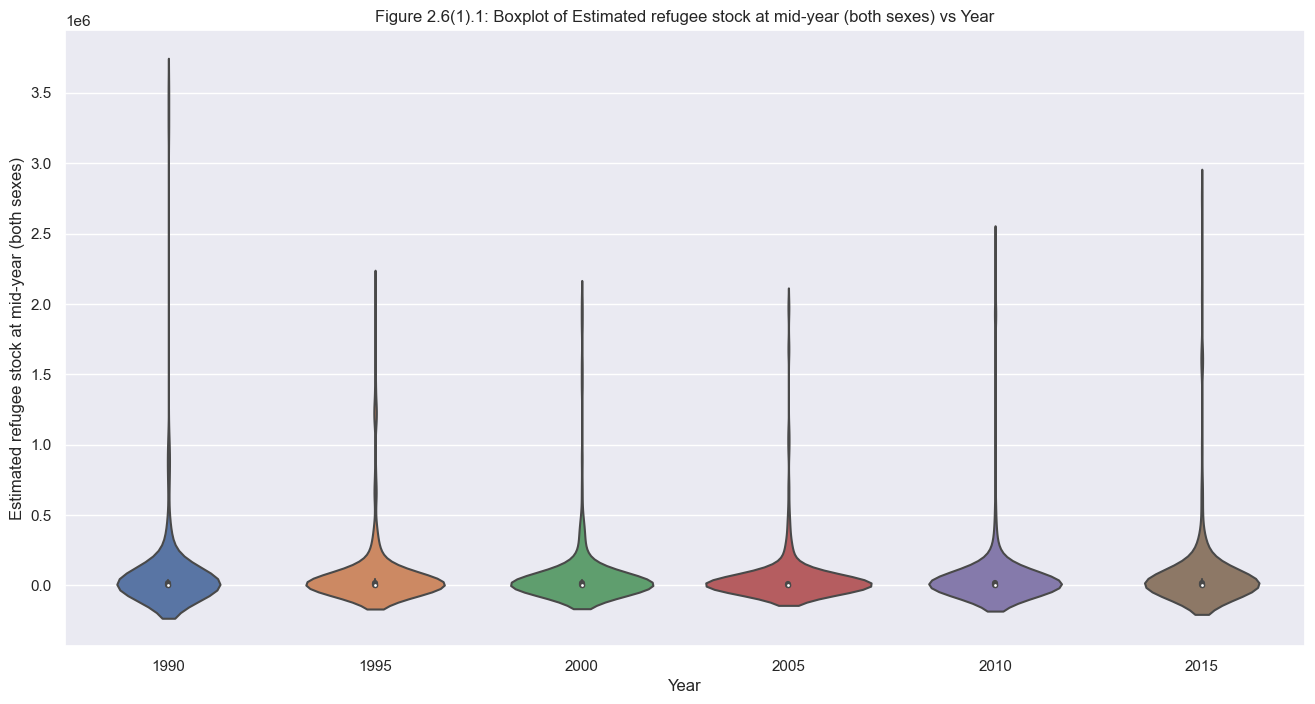

In [120]:
#2.6(1).1 Find trends in data - Estimated refugee stock at mid-year among different year
sns.set()
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet6_1_countryonly = tidy_data_sheet6_1.loc[~tidy_data_sheet6_1['Major area, region, country or area of destination'].isin(sum_list)]

plt.figure(figsize=(16,8))
sns.violinplot(y='Estimated refugee stock at mid-year (both sexes)', x='Year', data=tidy_data_sheet6_1_countryonly)
plt.title('Figure 2.6(1).1: Boxplot of Estimated refugee stock at mid-year (both sexes) vs Year')
plt.show()
#Does not show informations well

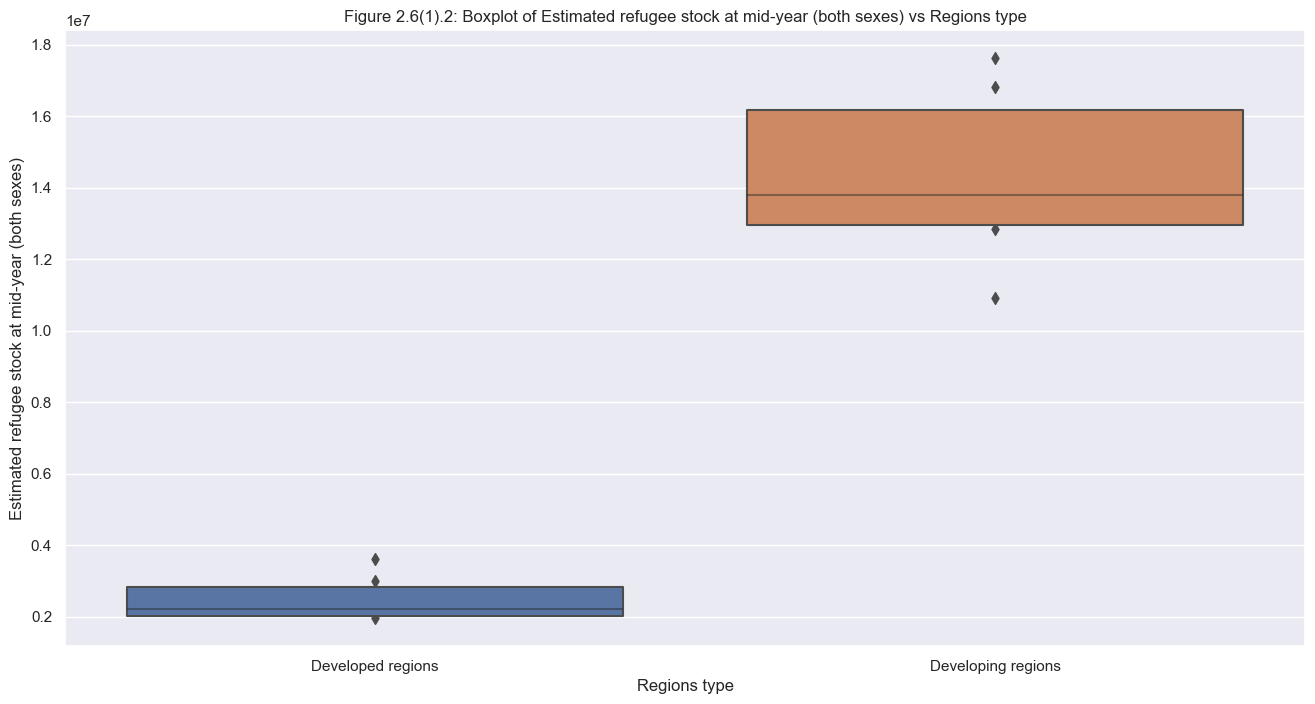

In [123]:
#2.6(1).2 Find trends in data - Estimated refugee stock at mid-year between region type
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet6_1= tidy_data_sheet6_1.loc[tidy_data_sheet6_1["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Estimated refugee stock at mid-year (both sexes)', data=region_sheet6_1)
plt.xlabel('Regions type')
plt.title('Figure 2.6(1).2: Boxplot of Estimated refugee stock at mid-year (both sexes) vs Regions type')
plt.show()
#Aggregated data, does not visualize well

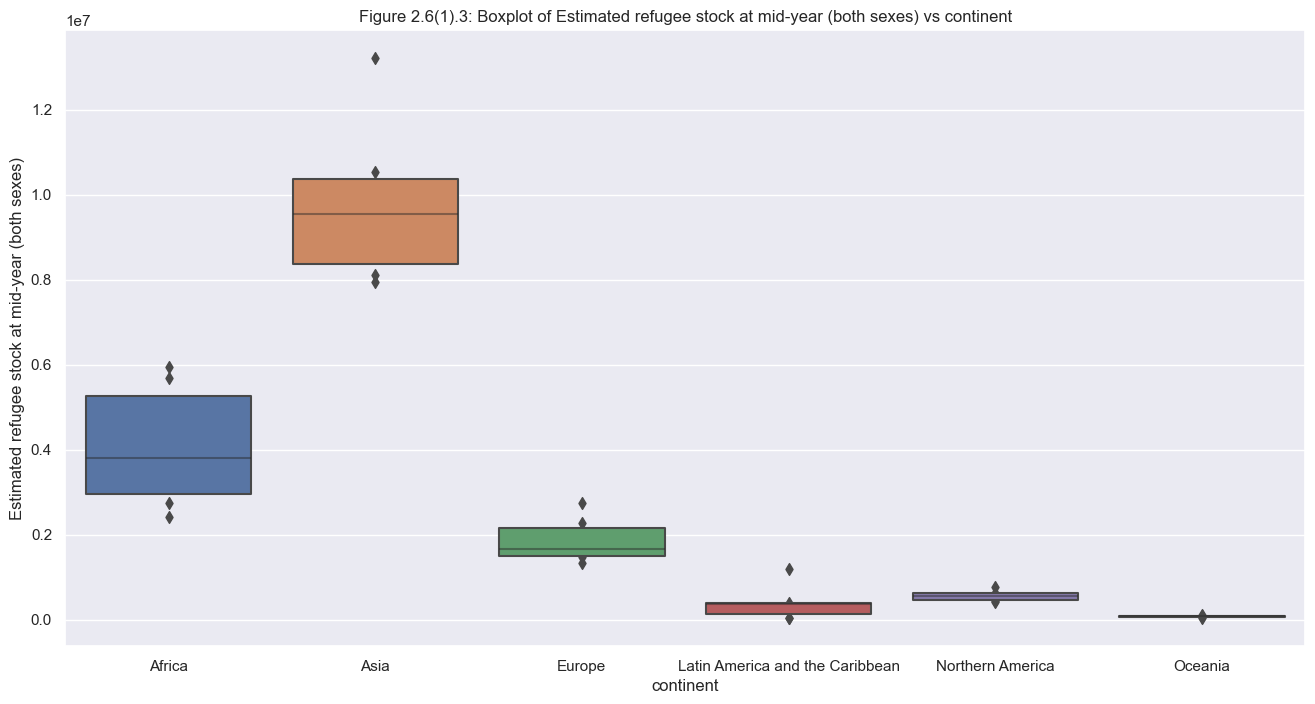

In [125]:
#2.6(1).3 Find trends in data - Estimated refugee stock at mid-year among different continent
sns.set()
continent = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania","Northern America"]
continent_sheet6_1= tidy_data_sheet6_1.loc[tidy_data_sheet6_1["Major area, region, country or area of destination"].isin(continent)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Estimated refugee stock at mid-year (both sexes)', data=continent_sheet6_1)
plt.xlabel('continent')
plt.title('Figure 2.6(1).3: Boxplot of Estimated refugee stock at mid-year (both sexes) vs continent')
plt.show()
#Better visualization, however still aggregated

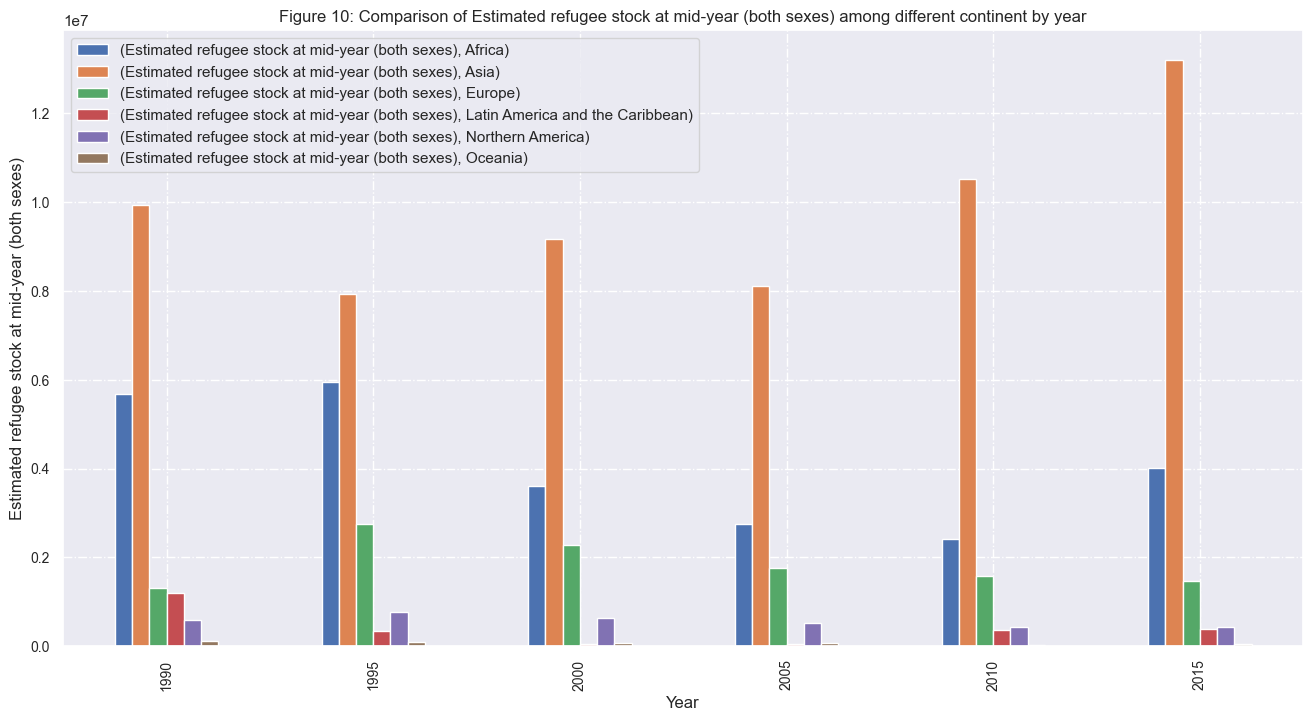

In [128]:
#2.6(1).4 Comparison of Estimated refugee stock at mid-year among different continent by year
continent_sheet6_1_pivot = pd.pivot_table(continent_sheet6_1, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Estimated refugee stock at mid-year (both sexes)'])
continent_sheet6_1_pivot.plot.bar(y=['Estimated refugee stock at mid-year (both sexes)'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Estimated refugee stock at mid-year (both sexes)")
plt.title("Figure 10: Comparison of Estimated refugee stock at mid-year (both sexes) among different continent by year")
plt.legend()
plt.show()
#Figure shows the trend in refugee stock nicely thorugh years
#Input as Figure 10

####(2) Refugees as a percentage of the international migrant stock

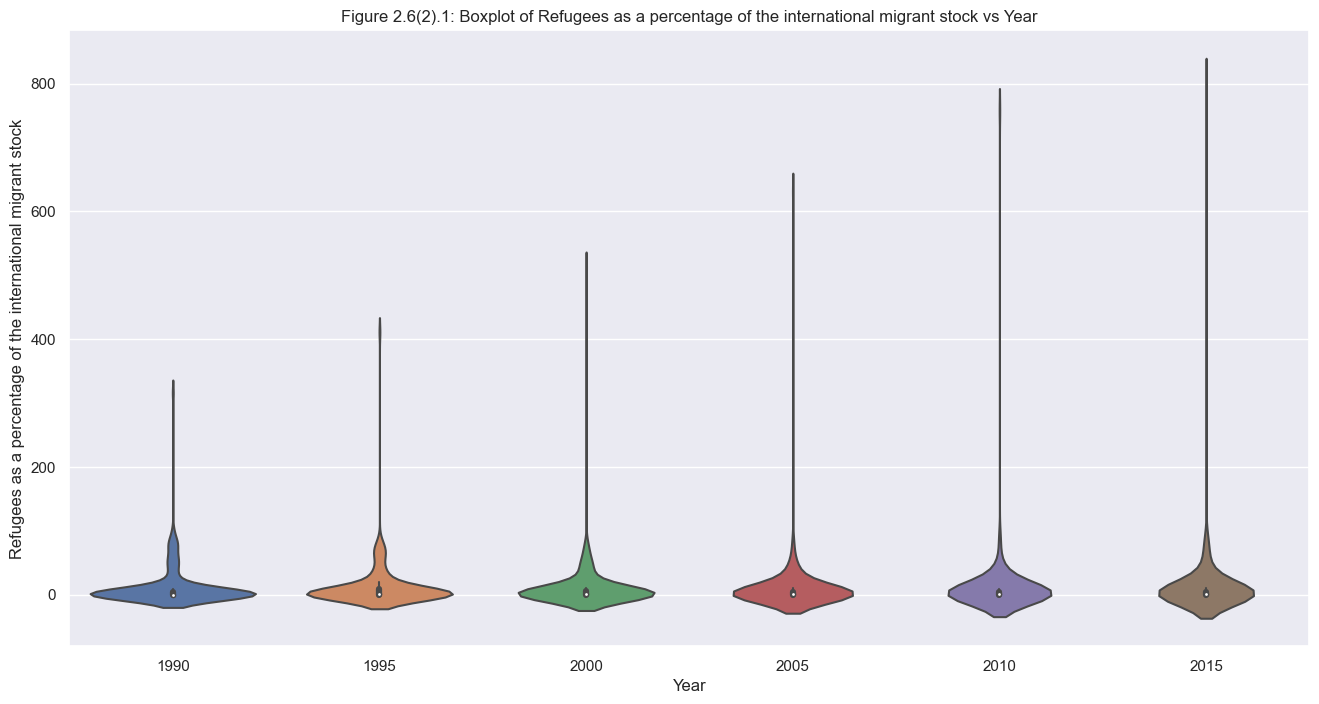

In [129]:
#2.6(2).1 Find trends in data - Refugees as a percentage of the international migrant stock among different year
sns.set()
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet6_2_countryonly = tidy_data_sheet6_2.loc[~tidy_data_sheet6_2['Major area, region, country or area of destination'].isin(sum_list)]

plt.figure(figsize=(16,8))
sns.violinplot(y='Refugees as a percentage of the international migrant stock', x='Year', data=tidy_data_sheet6_2_countryonly)
plt.title('Figure 2.6(2).1: Boxplot of Refugees as a percentage of the international migrant stock vs Year')
plt.show()
#Not sufficient visual 

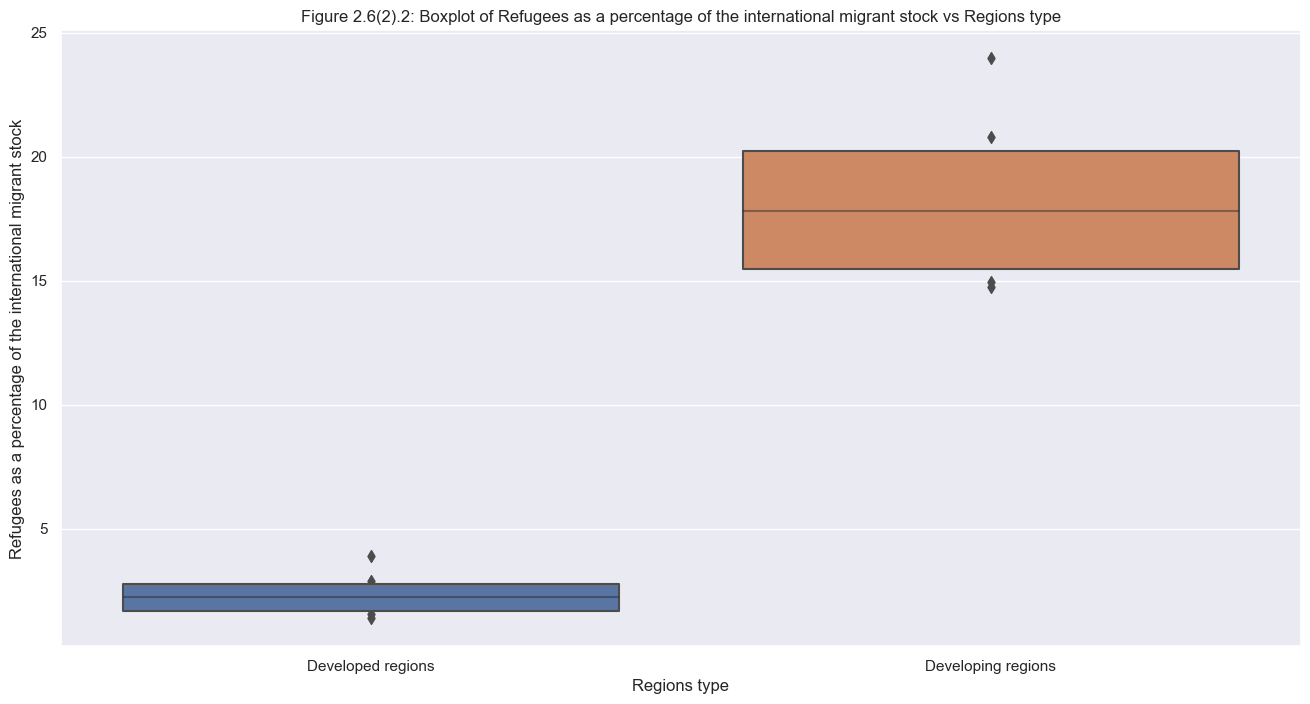

In [130]:
#2.6(2).2 Find trends in data - Refugees as a percentage of the international migrant stock between region type
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet6_2= tidy_data_sheet6_2.loc[tidy_data_sheet6_2["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Refugees as a percentage of the international migrant stock', data=region_sheet6_2)
plt.xlabel('Regions type')
plt.title('Figure 2.6(2).2: Boxplot of Refugees as a percentage of the international migrant stock vs Regions type')
plt.show()
#does not portray information

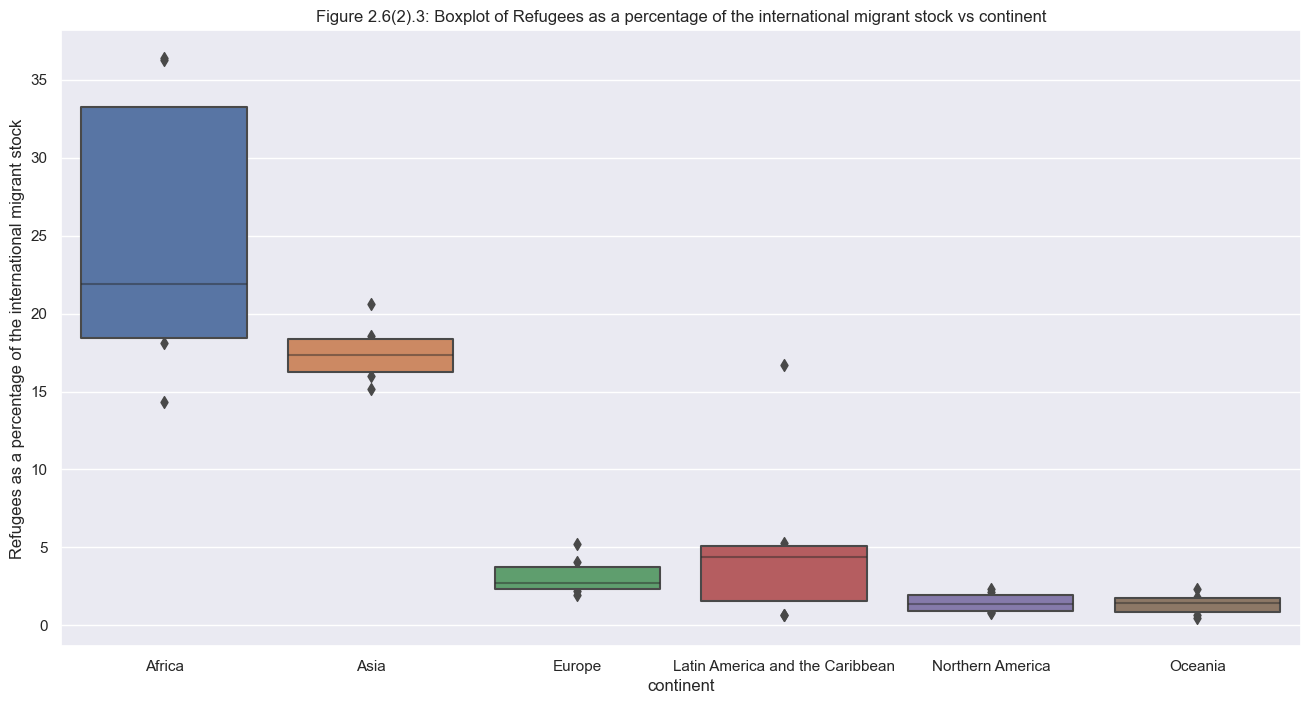

In [134]:
#2.6(2).3 Find trends in data - Refugees as a percentage of the international migrant stock among different continent
sns.set()
continent = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania","Northern America"]
continent_sheet6_2= tidy_data_sheet6_2.loc[tidy_data_sheet6_2["Major area, region, country or area of destination"].isin(continent)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Refugees as a percentage of the international migrant stock', data=continent_sheet6_2)
plt.xlabel('continent')
plt.title('Figure 2.6(2).3: Boxplot of Refugees as a percentage of the international migrant stock vs continent')
plt.show()
#need to be separated by year to show trend

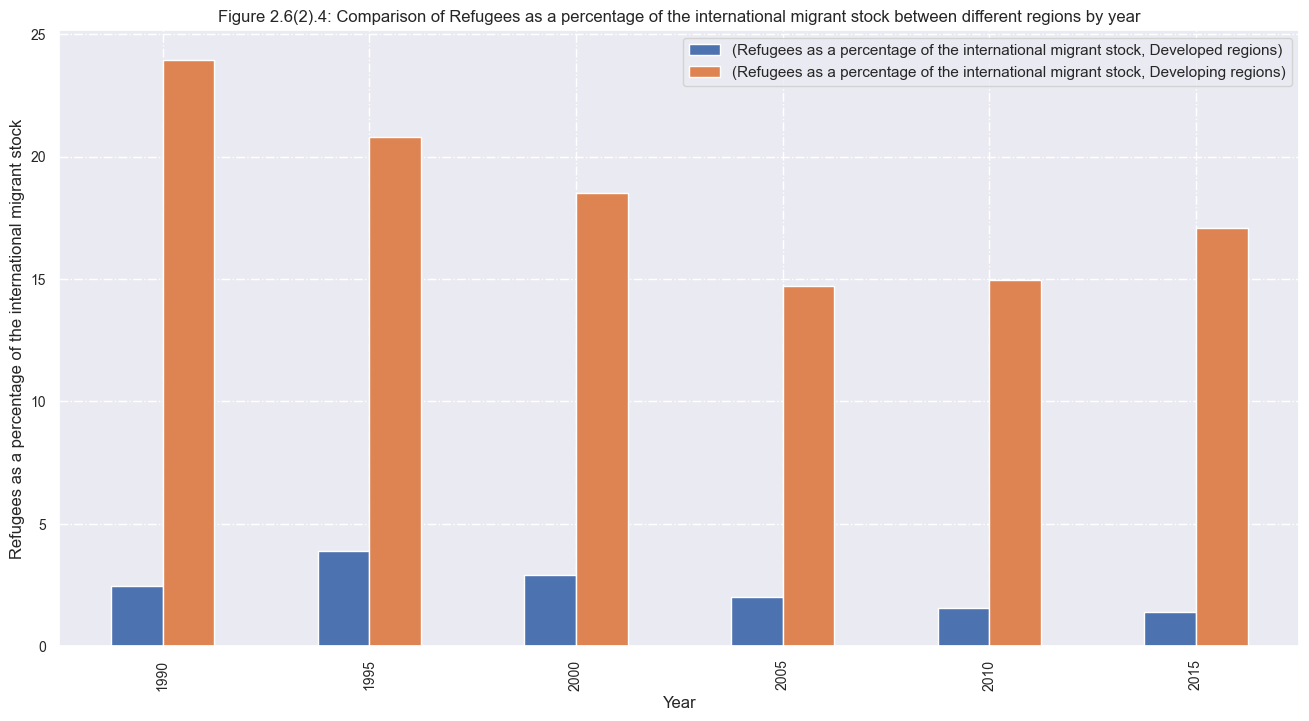

In [135]:
#2.6(2).4 Comparison of Refugees as a percentage of the international migrant stock between different regions by year
region_sheet6_2_pivot = pd.pivot_table(region_sheet6_2, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Refugees as a percentage of the international migrant stock'])
region_sheet6_2_pivot.plot.bar(y=['Refugees as a percentage of the international migrant stock'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Refugees as a percentage of the international migrant stock")
plt.title("Figure 2.6(2).4: Comparison of Refugees as a percentage of the international migrant stock between different regions by year")
plt.legend()
plt.show()
#Good visualization however, we can do a little better and do continent instead of regions for more info

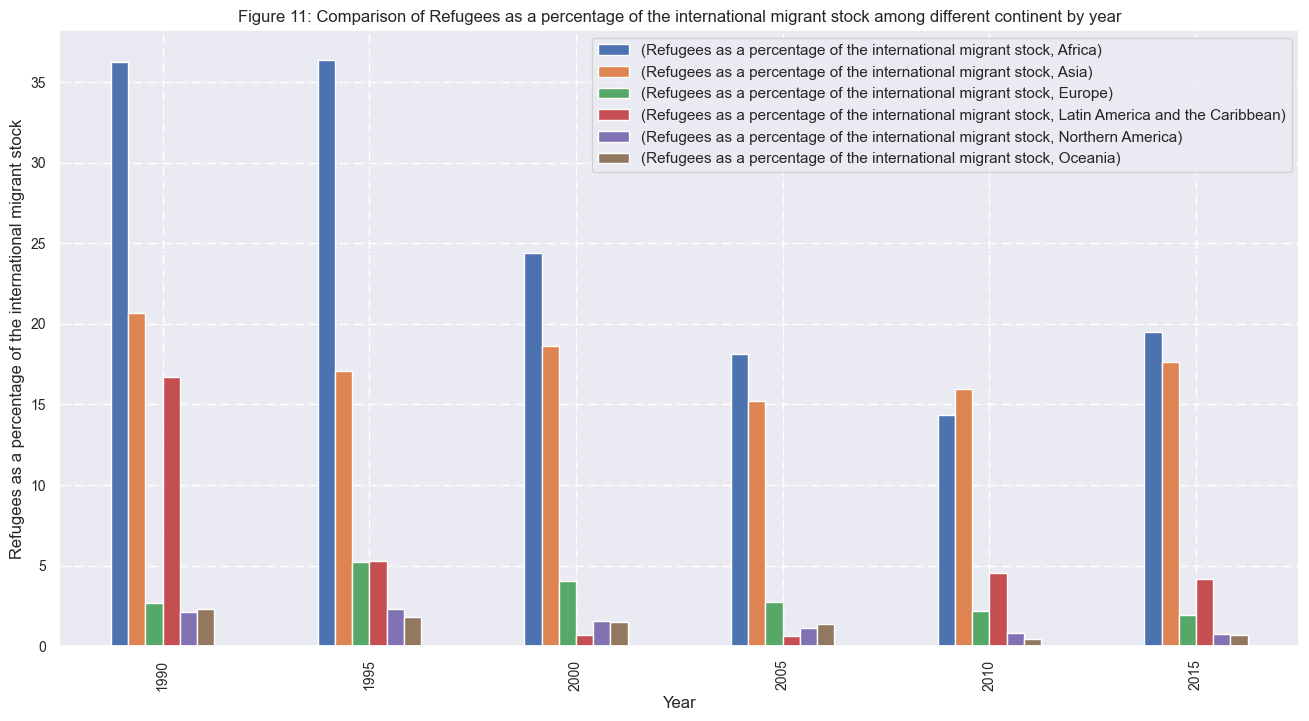

In [138]:
#2.6(2).5 Comparison of Refugees as a percentage of the international migrant stock among different continent by year
continent_sheet6_2_pivot = pd.pivot_table(continent_sheet6_2, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Refugees as a percentage of the international migrant stock'])
continent_sheet6_2_pivot.plot.bar(y=['Refugees as a percentage of the international migrant stock'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Refugees as a percentage of the international migrant stock")
plt.title("Figure 11: Comparison of Refugees as a percentage of the international migrant stock among different continent by year")
plt.legend()
plt.show()
#Good visualization with many information, include as figure 11

####(3) Annual rate of change of the refugee stock

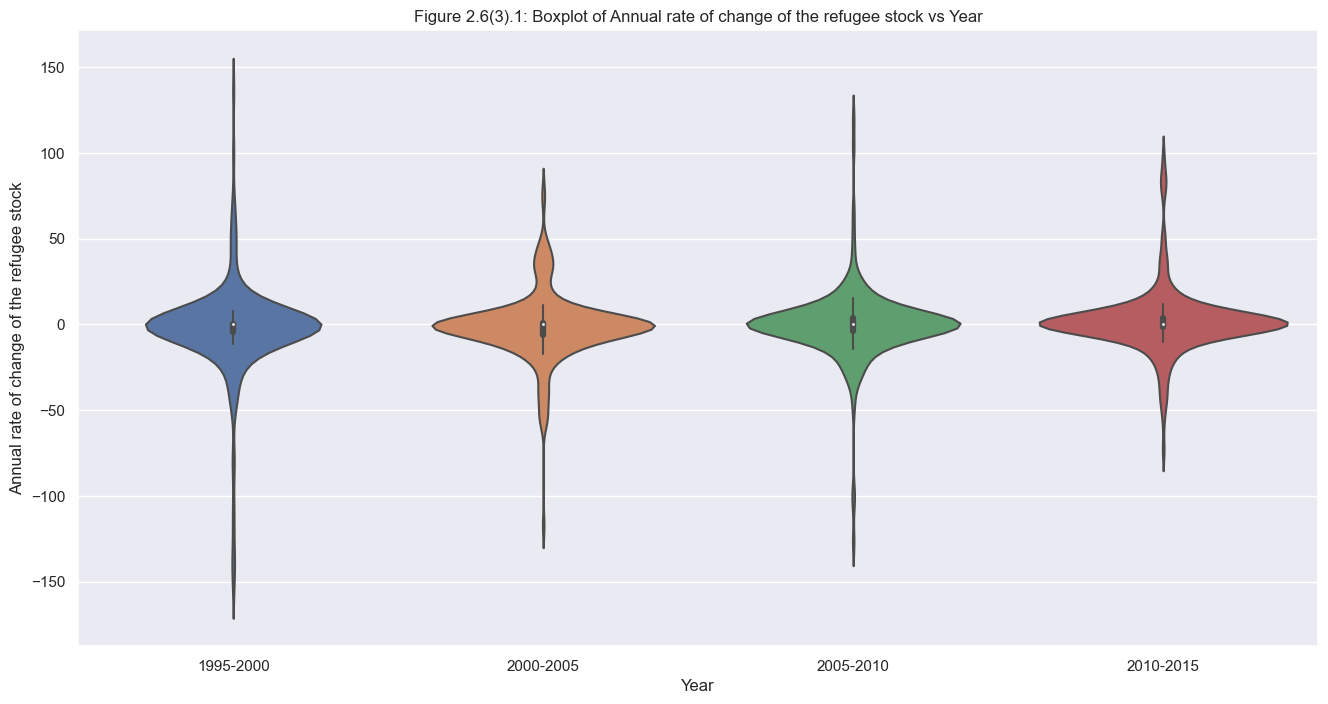

In [146]:
#2.6(3).1 Find trends in data - Annual rate of change of the refugee stock among different year
sns.set()
sum_list = ["WORLD","Developed regions","Developing regions", "Least developed countries", "Less developed regions excluding least developed countries",
            "Sub-Saharan Africa", "Africa", "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa","Western Africa","Asia",
            "Central Asia", "Eastern Asia", "South-Eastern Asia", "Southern Asia", "Western Asia", "Europe", "Eastern Europe", "Northern Europe", 
            "Southern Europe","Western Europe", "Latin America and the Caribbean", "Caribbean", "Central America", "South America","Northern America", 
            "Oceania", "Australia and New Zealand", "Melanesia", "Micronesia","Polynesia"]
tidy_data_sheet6_3_countryonly = tidy_data_sheet6_3.loc[~tidy_data_sheet6_3['Major area, region, country or area of destination'].isin(sum_list)]

plt.figure(figsize=(16,8))
sns.violinplot(y='Annual rate of change of the refugee stock', x='Year', data=tidy_data_sheet6_3_countryonly)
plt.title('Figure 2.6(3).1: Boxplot of Annual rate of change of the refugee stock vs Year')
plt.show()
#Does not provide well visualization
#Tried with violin but they dont work well in the data set

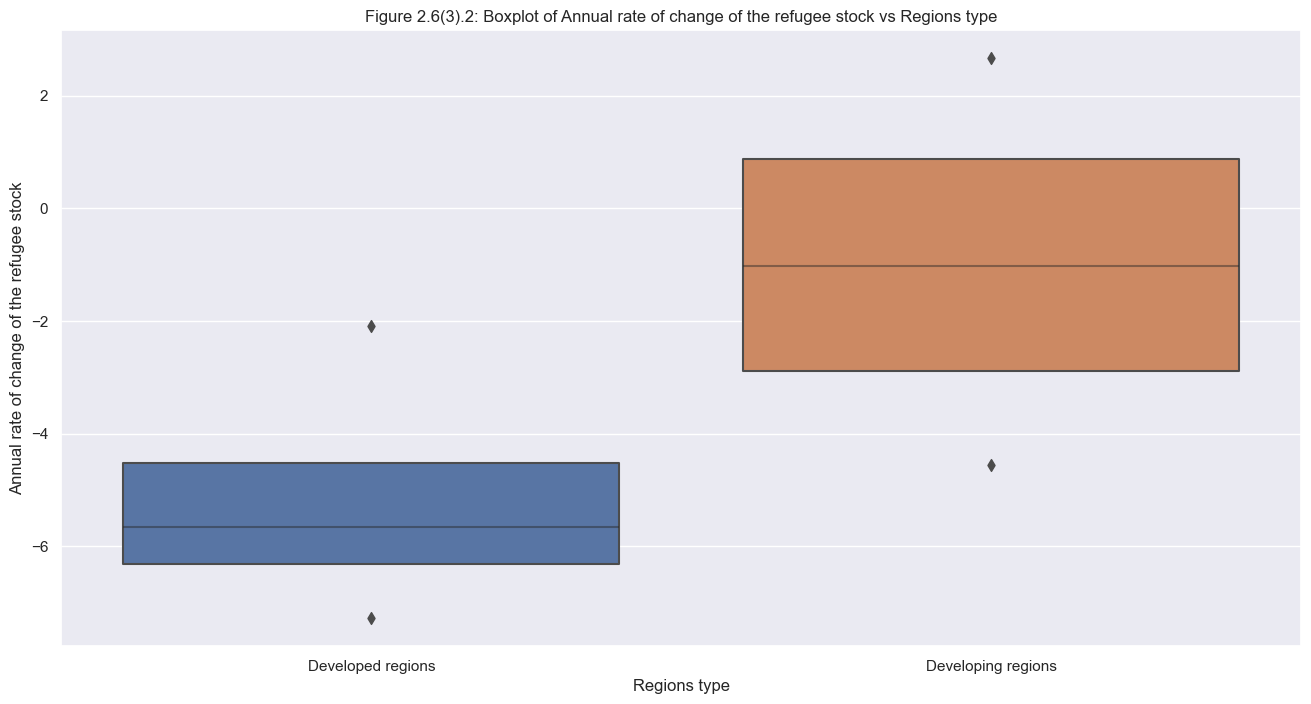

In [147]:
#2.6(3).2 Find trends in data - Annual rate of change of the refugee stock between region type
sns.set()
regions = ["Developed regions", "Developing regions"]
region_sheet6_3= tidy_data_sheet6_3.loc[tidy_data_sheet6_3["Major area, region, country or area of destination"].isin(regions)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Annual rate of change of the refugee stock', data=region_sheet6_3)
plt.xlabel('Regions type')
plt.title('Figure 2.6(3).2: Boxplot of Annual rate of change of the refugee stock vs Regions type')
plt.show()
#Similar steps as above, should separate

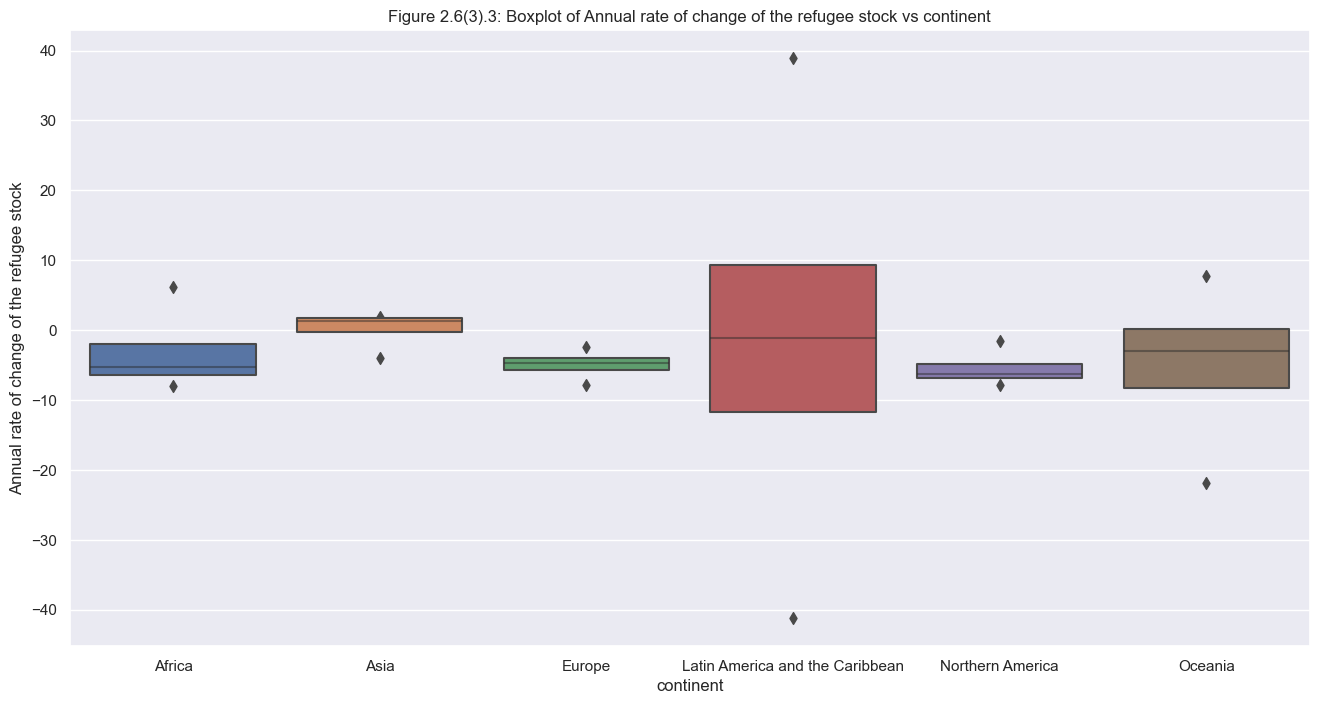

In [148]:
#2.6(3).3 Find trends in data - Annual rate of change of the refugee stock among different continent
sns.set()
continent = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania","Northern America"]
continent_sheet6_3= tidy_data_sheet6_3.loc[tidy_data_sheet6_3["Major area, region, country or area of destination"].isin(continent)]
plt.figure(figsize=(16,8))

sns.boxenplot(x='Major area, region, country or area of destination', y='Annual rate of change of the refugee stock', data=continent_sheet6_3)
plt.xlabel('continent')
plt.title('Figure 2.6(3).3: Boxplot of Annual rate of change of the refugee stock vs continent')
plt.show()
#Need to add time to investigate trend 

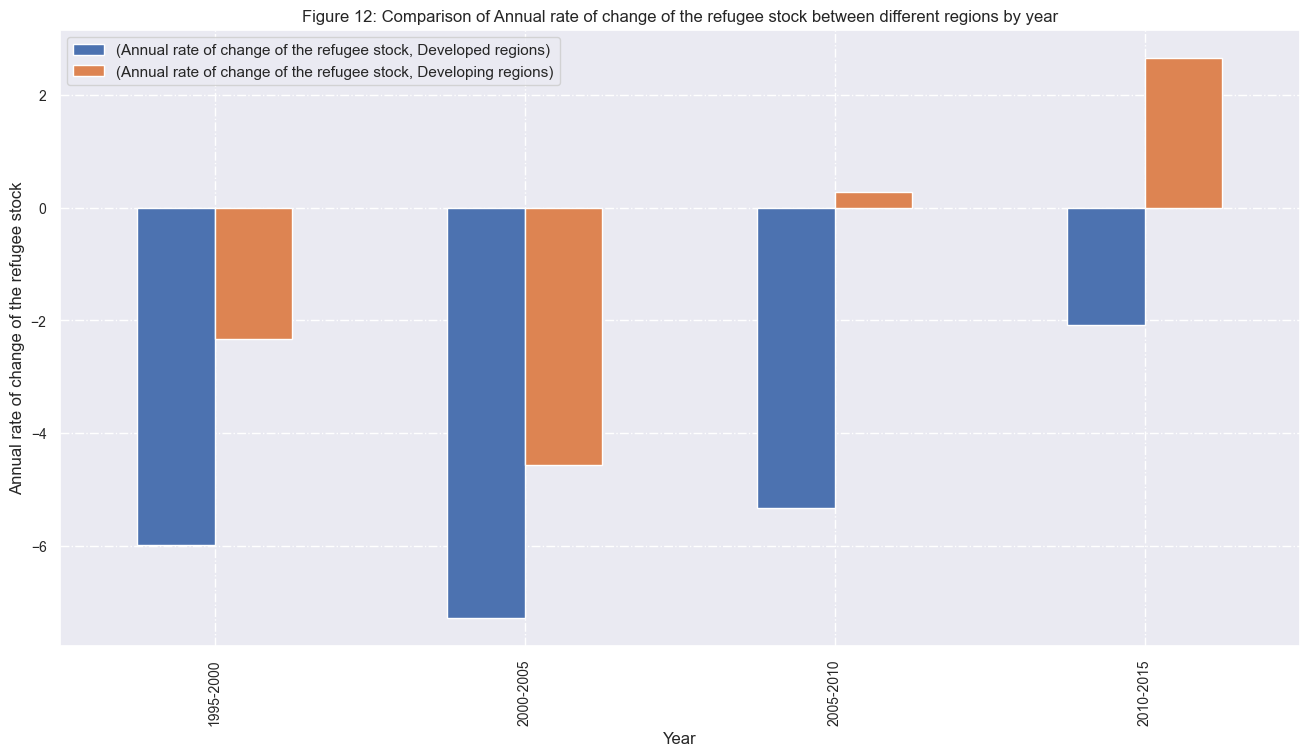

In [150]:
#2.6(3).4 Comparison of Annual rate of change of the refugee stock between different regions by year
region_sheet6_3_pivot = pd.pivot_table(region_sheet6_3, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Annual rate of change of the refugee stock'])
region_sheet6_3_pivot.plot.bar(y=['Annual rate of change of the refugee stock'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Annual rate of change of the refugee stock")
plt.title("Figure 12: Comparison of Annual rate of change of the refugee stock between different regions by year")
plt.legend()
plt.show()
#This plot nicely shows the trend of change in refugee. 

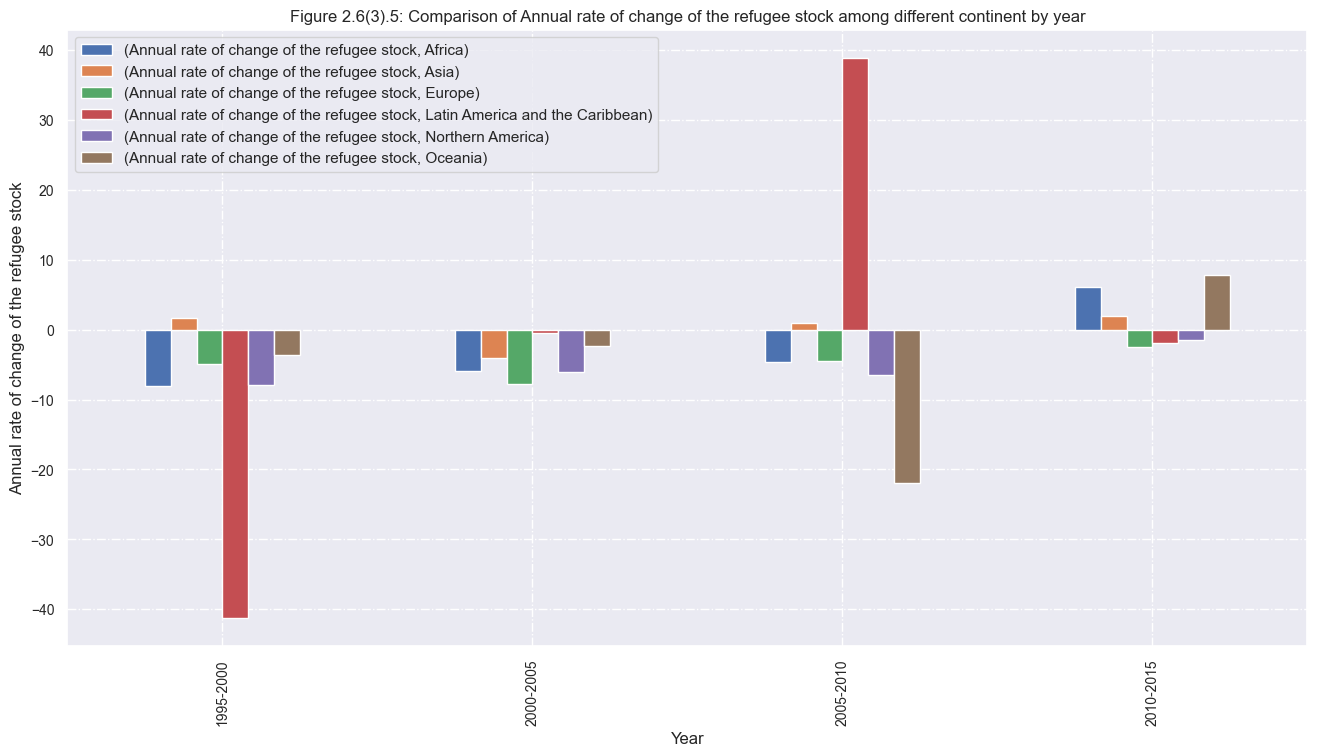

In [145]:
#2.6(3).5 Comparison of Annual rate of change of the refugee stock among different continent by year
continent_sheet6_3_pivot = pd.pivot_table(continent_sheet6_3, columns = ['Major area, region, country or area of destination'], index=["Year"], values=['Annual rate of change of the refugee stock'])
continent_sheet6_3_pivot.plot.bar(y=['Annual rate of change of the refugee stock'], figsize=(16,8), fontsize=(10))
plt.grid(linestyle = "-.")
plt.xlabel("Year")
plt.ylabel("Annual rate of change of the refugee stock")
plt.title("Figure 2.6(3).5: Comparison of Annual rate of change of the refugee stock among different continent by year")
plt.legend()
plt.show()

### APPENDIX

In [43]:
#create appendix to connect country with notes and type of data(a
data_sheet7 =pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name="Table 1", usecols=[0,1,2,3,4],header=15)
data_sheet7 = pd.DataFrame(data_sheet7)
data_sheet7.rename(columns={'Unnamed: 0': 'Sort Order'},inplace=True)
data_sheet7.rename(columns={'Unnamed: 1': 'Major area, region, country or area of destination'},inplace=True)
data_sheet7.rename(columns={'Unnamed: 2': 'Notes'},inplace=True)
data_sheet7.rename(columns={'Unnamed: 3': 'Country Code'},inplace=True)
data_sheet7.rename(columns={'Unnamed: 4': 'Type of data (a)'},inplace=True)
data_sheet7

,Sort Order,"Major area, region, country or area of destination",Notes,Country Code,Type of data (a)
0,1,WORLD,NaN,900,NaN
1,2,Developed regions,(b),901,NaN
2,3,Developing regions,(c),902,NaN
3,4,Least developed countries,(d),941,NaN
4,5,Less developed regions excluding least develop...,NaN,934,NaN
...,...,...,...,...,...
260,261,Samoa,NaN,882,B
261,262,Tokelau,NaN,772,B
262,263,Tonga,NaN,776,B
263,264,Tuvalu,NaN,798,C
